## `DATA CLEANING CONTINUE`

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', None)
from sklearn.impute import KNNImputer
pd.set_option('display.max_rows',90)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [3]:
df.shape

(984, 24)

In [2]:
df=pd.read_csv('/content/Smartphone_Cleaned (1).csv')
df.head()

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size,display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version
0,ONEPLUS,OnePlus 11 5G,54999,89.0,1,1,0,Snapdragon,3.2 GHz Processor,Octa Core,12 GB RAM,256 GB inbuilt,5000 mAh,1,6.7 inches,1440,3216,120,3,1.0,0.0,0,Android,v13
1,ONEPLUS,OnePlus Nord CE 2 Lite 5G,19989,81.0,1,0,0,Snapdragon,2.2 GHz Processor,Octa Core,6 GB RAM,128 GB inbuilt,5000 mAh,1,6.59 inches,1080,2412,120,3,1.0,1.0,1 TB,Android,v12
2,SAMSUNG,Samsung Galaxy A14 5G,16499,75.0,1,0,0,Exynos,2.4 GHz Processor,Octa Core,4 GB RAM,64 GB inbuilt,5000 mAh,1,6.6 inches,1080,2408,90,3,1.0,1.0,1 TB,Android,v13
3,MOTOROLA,Motorola Moto G62 5G,14999,81.0,1,0,0,Snapdragon,2.2 GHz Processor,Octa Core,6 GB RAM,128 GB inbuilt,5000 mAh,1,6.55 inches,1080,2400,120,3,1.0,1.0,1 TB,Android,v12
4,REALME,Realme 10 Pro Plus,24999,82.0,1,0,0,Dimensity,2.6 GHz Processor,Octa Core,6 GB RAM,128 GB inbuilt,5000 mAh,1,6.7 inches,1080,2412,120,3,1.0,0.0,0,Android,v13


In [4]:
df[df['display_height'].isna()]

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size,display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version
374,NOKIA,Nokia 2660 Flip,4649,NaN,0,0,0,No,Unknown,NaN,Unisoc T107,NaN,NaN,0,48 MB RAM,128 MB,NaN,60,1,1.0,0.0,0,Unknown,NaN
734,APPLE,Apple iPod Touch (7th Gen),18900,NaN,0,0,0,32 GB,Unknown,NaN,4 inches,640 x 1136 px Display,NaN,0,8 MP Rear & 1.2 MP Front Camera,&,NaN,60,1,1.0,0.0,0,Unknown,NaN


In [5]:
df[df['os_version'].isna()]

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size,display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version
158,OPPO,Oppo Find N2 5G,94990,NaN,1,1,0,Snapdragon,3.2 GHz Processor,Octa Core,12 GB RAM,256 GB inbuilt,4520 mAh,1,7.1 inches,1792,1920,120,3,2.0,0.0,0,Unknown,NaN
304,SAMSUNG,Samsung Galaxy Z Flip 3,69999,84.0,1,1,0,Snapdragon,2.84 GHz Processor,Octa Core,8 GB RAM,128 GB inbuilt,3300 mAh,1,6.7 inches,1080,2640,120,2,1.0,0.0,0,Unknown,NaN
320,ROYOLE,Royole FlexPai 2,109999,87.0,1,0,0,Snapdragon,2.84 GHz Processor,Octa Core,8 GB RAM,128 GB inbuilt,4450 mAh,0,7.8 inches,1440,1920,60,3,1.0,1.0,256 GB,Unknown,NaN
363,OPPO,OPPO Find N Flip,89990,88.0,1,1,0,Dimensity,3.05 GHz Processor,Octa Core,8 GB RAM,128 GB inbuilt,4300 mAh,1,6.8 inches,1200,2400,120,2,1.0,0.0,0,Unknown,NaN
374,NOKIA,Nokia 2660 Flip,4649,NaN,0,0,0,No,Unknown,NaN,Unisoc T107,NaN,NaN,0,48 MB RAM,128 MB,NaN,60,1,1.0,0.0,0,Unknown,NaN
390,OPPO,OPPO Find N2 Flip,70990,88.0,1,1,0,Dimensity,3.2 GHz Processor,Octa Core,8 GB RAM,256 GB inbuilt,4300 mAh,1,6.8 inches,1080,2520,120,2,1.0,0.0,0,Unknown,NaN
482,NOKIA,Nokia 8000 4G,6899,NaN,0,0,0,Snapdragon,1.1 GHz Processor,Quad Core,512 MB RAM,4 GB inbuilt,1500 mAh,0,2.8 inches,240,320,60,1,1.0,1.0,0,Unknown,NaN
500,SAMSUNG,Samsung Galaxy Z Flip 4 5G,89999,88.0,1,1,0,Snapdragon,3.2 GHz Processor,Octa Core,8 GB RAM,128 GB inbuilt,3700 mAh,1,6.7 inches,1080,2640,120,2,1.0,0.0,0,Unknown,NaN
563,LG,LG Wing 5G,54999,89.0,1,1,0,Snapdragon,2.4 GHz Processor,Octa Core,8 GB RAM,128 GB inbuilt,4000 mAh,1,6.8 inches,1080,2460,60,3,1.0,1.0,2 TB,Unknown,NaN
601,OUKITEL,Oukitel WP21,22990,82.0,0,0,0,Helio,2.2 GHz Processor,Octa Core,12 GB RAM,256 GB inbuilt,9800 mAh,1,6.78 inches,1080,2400,120,3,1.0,1.0,0,Unknown,NaN


In [6]:
df['os_version'].fillna('Unknown',inplace=True)

In [7]:
df=df.drop([374,734])

In [8]:
df['card_supported']=df['card_supported'].astype(int)
# df['rating']=df['rating'].astype(int)
df['Number_of_front_camera']=df['Number_of_front_camera'].astype(int)
df['display_height']=df['display_height'].astype(int)
df['display_width']=df['display_width'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 983
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand_name               982 non-null    object 
 1   model                    982 non-null    object 
 2   price                    982 non-null    int64  
 3   rating                   879 non-null    float64
 4   has_5G                   982 non-null    int64  
 5   has_nfc                  982 non-null    int64  
 6   has_IR_Blaster           982 non-null    int64  
 7   processor_name           978 non-null    object 
 8   processor_frequency      982 non-null    object 
 9   Core                     966 non-null    object 
 10  RAM                      982 non-null    object 
 11  ROM                      979 non-null    object 
 12  battery_capacity         971 non-null    object 
 13  fast_charging_available  982 non-null    int64  
 14  display_size             982 no

In [10]:
df['display_size']=df['display_size'].str.split(' ').str.get(0).astype(float)

In [11]:
df.rename(columns={'display_size':'display_size(inches)'}, inplace=True)

In [12]:
df[df['ROM'].isna()]

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version
436,APPLE,Apple iPhone SE 3 2022,43900,NaN,1,1,0,Bionic,3.22 GHz Processor,Hexa Core,64 GB inbuilt,NaN,NaN,0,4.70,750,1334,60,1,1,0,0,iOS,v15
479,HUAWEI,Huawei Mate 50 RS Porsche Design,239999,81.0,0,1,1,Snapdragon,3.2 GHz Processor,Octa Core,512 GB inbuilt,NaN,4700 mAh,1,6.74,1212,2616,120,3,1,1,256 GB,Hongmeng,OS v3.0
741,APPLE,Apple iPhone SE 4,49990,60.0,1,1,0,Bionic,3.22 GHz Processor,Hexa Core,64 GB inbuilt,NaN,NaN,0,6.10,750,1580,60,1,1,0,0,iOS,v16


In [13]:
df['RAM'].value_counts(dropna=False)

,count
RAM,
8 GB RAM,339
6 GB RAM,234
4 GB RAM,215
12 GB RAM,85
3 GB RAM,54
2 GB RAM,32
16 GB RAM,9
1 GB RAM,7
18 GB RAM,2


In [14]:
df[df['RAM'].str.contains('MB')]

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version
482,NOKIA,Nokia 8000 4G,6899,NaN,0,0,0,Snapdragon,1.1 GHz Processor,Quad Core,512 MB RAM,4 GB inbuilt,1500 mAh,0,2.8,240,320,60,1,1,1,0,Unknown,Unknown
615,NOKIA,Nokia 225 4G,3589,NaN,0,0,0,Unisoc,Unknown,NaN,64 MB RAM,128 MB inbuilt,1150 mAh,0,2.4,240,320,60,1,1,1,32 GB,Unknown,Unknown


In [15]:
df['RAM']=df['RAM'].str.strip()

In [16]:
df['RAM']=df['RAM'].str.split(' ').str.get(0).str.replace('GB','').str.replace('MB','').str.strip()

In [17]:
df.loc[615,'ROM']=' 128 GB inbuilt'

In [18]:
# df[df['ROM'].str.contains('TB')]

In [19]:
df['ROM']=df['ROM'].str.split(' ').str.get(1).str.replace('GB','').str.replace('TB','').str.strip()

In [20]:
df['ROM'].value_counts()

,count
ROM,
128,524
64,191
256,157
32,67
512,21
16,12
1,5
4,1
8,1


In [21]:
df['RAM'].value_counts()

,count
RAM,
8,339
6,234
4,215
12,85
3,54
2,32
16,9
1,7
64,3


In [22]:
df[df['ROM']=='inbuilt']

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version


In [23]:
df[df['ROM'].isna()]

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version
436,APPLE,Apple iPhone SE 3 2022,43900,NaN,1,1,0,Bionic,3.22 GHz Processor,Hexa Core,64,NaN,NaN,0,4.70,750,1334,60,1,1,0,0,iOS,v15
479,HUAWEI,Huawei Mate 50 RS Porsche Design,239999,81.0,0,1,1,Snapdragon,3.2 GHz Processor,Octa Core,512,NaN,4700 mAh,1,6.74,1212,2616,120,3,1,1,256 GB,Hongmeng,OS v3.0
741,APPLE,Apple iPhone SE 4,49990,60.0,1,1,0,Bionic,3.22 GHz Processor,Hexa Core,64,NaN,NaN,0,6.10,750,1580,60,1,1,0,0,iOS,v16


In [24]:
df.loc[741,'ROM']='128'
df.loc[436,'ROM']='128'
df.loc[479,'ROM']='512'

In [25]:
df['ROM']=df['ROM'].astype(int)

In [26]:
df['RAM']=df['RAM'].astype(int)

In [27]:
df[df['RAM']=='4\u2009GB RAM']

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 983
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand_name               982 non-null    object 
 1   model                    982 non-null    object 
 2   price                    982 non-null    int64  
 3   rating                   879 non-null    float64
 4   has_5G                   982 non-null    int64  
 5   has_nfc                  982 non-null    int64  
 6   has_IR_Blaster           982 non-null    int64  
 7   processor_name           978 non-null    object 
 8   processor_frequency      982 non-null    object 
 9   Core                     966 non-null    object 
 10  RAM                      982 non-null    int64  
 11  ROM                      982 non-null    int64  
 12  battery_capacity         971 non-null    object 
 13  fast_charging_available  982 non-null    int64  
 14  display_size(inches)     982 no

In [29]:
df['extended_upto'].value_counts()

,count
extended_upto,
0,474
1 TB,262
512 GB,116
256 GB,104
128 GB,10
2 TB,8
32 GB,4
64 GB,3
1000 GB,1


In [30]:
df['extended_upto']=df['extended_upto'].str.replace('0','Unknow')

In [31]:
battery_capacity_dict = {
    'Apple iPhone 12': 2815,         # Example value
    'Apple iPhone 12 Mini': 2227,     # Example value
    'Apple iPhone 12 (128GB)': 2815,  # Same as above model
    'Apple iPhone 12 Mini (128GB)': 2227,  # Same as above model
    'Apple iPhone SE 3 2022': 2018,   # Example value
    'Apple iPhone 15 Pro': 3095,      # Example value
    'Apple iPhone 12 Pro (512GB)': 2815, # Same as above model
    'Apple iPhone SE 4': 2178,        # Example value
    'Apple iPhone 12 Pro (256GB)': 2815, # Same as above model
    'Apple iPhone 12 Mini (256GB)': 2227, # Same as above model
    'Apple iPhone 12 (256GB)': 2815  # Same as above model
}
model_names = list(battery_capacity_dict.values())
model_names

[2815, 2227, 2815, 2227, 2018, 3095, 2815, 2178, 2815, 2227, 2815]

In [32]:
battery_capacities = [2815, 2227, 2815, 2227, 2018, 3095, 2815, 2178, 2815, 2227, 2815]

# Fill missing values using `loc`
df.loc[df['battery_capacity'].isna(), 'battery_capacity'] = battery_capacities

In [33]:
df['battery_capacity'].isna().sum()

0

In [34]:
df.isna().sum()

,0
Brand_name,0
model,0
price,0
rating,103
has_5G,0
has_nfc,0
has_IR_Blaster,0
processor_name,4
processor_frequency,0
Core,16


In [35]:
processor_names = [
    'Qualcomm Snapdragon 695',  # Xiaomi Redmi Note 11 Pro Plus 5G
    'Qualcomm Snapdragon 695',  # Xiaomi Redmi Note 11 Pro Plus 5G (8GB RAM + 256GB)
    'Qualcomm Snapdragon 695',  # OPPO F21 Pro 5G
    'Qualcomm Snapdragon 695'   # Xiaomi Redmi Note 11 Pro Plus 5G (8GB RAM + 128GB)
]
df.loc[df['processor_name'].isna(), 'processor_name'] = processor_names

In [36]:
df[df['Core'].isna()]['model']

,model
118,Tesla Pi Phone
152,Apple iPhone 15 Pro Max
262,Apple iPhone XR2
280,Apple iPhone 14 Mini
426,Nokia X50 5G
445,Apple iPhone 15 Pro
492,Samsung Galaxy A15
525,Samsung Galaxy F14
615,Nokia 225 4G
709,Apple iPhone 15


In [37]:
core_names = [
    'Octa Core',    # Tesla Pi Phone
    'Hexa Core',    # Apple iPhone 15 Pro Max
    'Hexa Core',    # Apple iPhone XR2
    'Hexa Core',    # Apple iPhone 14 Mini
    'Octa Core',    # Nokia X50 5G
    'Hexa Core',    # Apple iPhone 15 Pro
    'Octa Core',    # Samsung Galaxy A15
    'Octa Core',    # Samsung Galaxy F14
    'Single Core',  # Nokia 225 4G
    'Hexa Core',    # Apple iPhone 15
    'Octa Core',    # Samsung Galaxy S23 FE 5G
    'Octa Core',    # Samsung Galaxy M51s 5G
    'Octa Core',    # Huawei Nova Y61
    'Octa Core',    # Samsung Galaxy M35
    'Octa Core',    # Samsung Galaxy A05
    'Octa Core'     # Samsung Galaxy M52s 5G
]

df.loc[df['Core'].isna(),'core']=core_names


In [38]:
df[df['os_name']=='Unknown']['model']

,model
158,Oppo Find N2 5G
304,Samsung Galaxy Z Flip 3
320,Royole FlexPai 2
363,OPPO Find N Flip
390,OPPO Find N2 Flip
482,Nokia 8000 4G
500,Samsung Galaxy Z Flip 4 5G
563,LG Wing 5G
601,Oukitel WP21
615,Nokia 225 4G


In [39]:
os_names = [
    'ColorOS',          # Oppo Find N2 5G
    'One UI',           # Samsung Galaxy Z Flip 3
    'Royole FlexPai OS',# Royole FlexPai 2
    'ColorOS',          # OPPO Find N Flip
    'ColorOS',          # OPPO Find N2 Flip
    'KaiOS',            # Nokia 8000 4G
    'One UI',           # Samsung Galaxy Z Flip 4 5G
    'Android',          # LG Wing 5G
    'Android',          # Oukitel WP21
    'KaiOS',            # Nokia 225 4G
    'Android',          # LG V60 ThinQ
    'Android',          # Asus ROG Phone 6D Ultimate
    'HarmonyOS',        # Huawei Mate Xs 2
    'Android',          # CAT S22 Flip
    'Royole FlexPai OS',# Royole FlexPai 3 5G
    'Android',          # TCL Ion X
    'EMUI'              # Huawei Mate X
]
df.loc[df['os_name']=='Unknown','os_name']=os_names

In [40]:
df['os_version'].value_counts()

,count
os_version,
v12,396
v11.0,278
v13,95
v10.0,92
v9.0 (Pie),29
Unknown,18
v16,15
v15,15
v8.1 (Oreo),10


In [41]:
df[df['os_version']=='Unknown']['model']

,model
158,Oppo Find N2 5G
304,Samsung Galaxy Z Flip 3
320,Royole FlexPai 2
363,OPPO Find N Flip
390,OPPO Find N2 Flip
482,Nokia 8000 4G
500,Samsung Galaxy Z Flip 4 5G
563,LG Wing 5G
601,Oukitel WP21
615,Nokia 225 4G


In [42]:
os_versions=['v13', 'UI', 'FlexPai', 'v12', 'v13', 'v3.0', 'UI', '10', '12', 'v3.0', '11', '12', '3.0', '11', '2.0', 'FlexPai', '12', '11']
df.loc[df['os_version']=='Unknown','os_version']=os_versions

In [43]:
df.sample(20)

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version,core
974,REALME,Realme Narzo 50i Prime (4GB RAM + 64GB),8720,64.0,0,0,0,Tiger,1.82 GHz Processor,Octa Core,4,64,5000 mAh,1,6.50,720,1600,60,1,1,1,1 TB,Android,v11.0,nan
364,ONEPLUS,OnePlus 10T (12GB RAM + 256GB),50999,87.0,1,1,0,Snapdragon,3.2 GHz Processor,Octa Core,12,256,4800 mAh,1,6.70,1080,2412,120,3,1,0,Unknow,Android,v12,nan
830,REALME,Realme 6 (6GB RAM + 64GB),12989,77.0,0,0,0,Helio,2.05 GHz Processor,Octa Core,6,64,4300 mAh,1,6.50,1080,2400,90,4,1,1,256 GB,Android,v10.0,nan
241,SAMSUNG,Samsung Galaxy A75 5G,44999,83.0,1,1,0,Snapdragon,Unknown,Octa Core Processor,8,128,5000 mAh,1,6.70,1080,2412,120,4,1,1,1 TB,Android,v12,nan
768,XIAOMI,Xiaomi Redmi 20X,10990,77.0,1,0,1,Dimensity,2.2 GHz Processor,Octa Core,4,128,5000 mAh,1,6.43,1080,2340,90,4,1,1,Unknow,Android,v10.0,nan
634,HUAWEI,Huawei Mate 40 Pro 4G,69990,NaN,0,1,1,Kirin,3.13 GHz Processor,Octa Core,8,128,4400 mAh,1,6.76,1344,2772,90,3,2,1,256 GB,Harmony,v2.0,nan
481,IQOO,iQOO Z6 4G (6GB RAM + 128GB),15999,80.0,0,0,0,Snapdragon,2.4 GHz Processor,Octa Core,6,128,5000 mAh,1,6.44,1080,2400,120,3,1,1,1 TB,Android,v12,nan
264,INFINIX,Infinix Note 12 5G,15999,78.0,1,0,0,Dimensity,2.4 GHz Processor,Octa Core,6,64,5000 mAh,1,6.70,1080,2400,60,3,1,1,2 TB,Android,v12,nan
622,REALME,Realme GT Neo 3T (8GB RAM + 128GB),26499,81.0,1,0,0,Snapdragon,3.2 GHz Processor,Octa Core,8,128,5000 mAh,1,6.62,1080,2400,120,3,1,0,Unknow,Android,v12,nan
207,TECNO,Tecno Pova 4,11999,73.0,0,0,0,Helio,2.2 GHz Processor,Octa Core,8,128,6000 mAh,1,6.82,720,1600,90,2,1,1,512 GB,Android,v12,nan


In [44]:
df=df.drop('core',axis=1)

In [45]:
df[df['processor_frequency']=='Unknown']

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version
27,APPLE,Apple iPhone 14 Pro Max,129990,76.0,1,1,0,Bionic,Unknown,Hexa Core Processor,6,128,4323 mAh,1,6.70,1290,2796,120,3,1,0,Unknow,iOS,v16
78,SAMSUNG,Samsung Galaxy A34 5G,24999,75.0,1,1,0,Exynos,Unknown,Octa Core Processor,6,128,5000 mAh,1,6.50,1080,2400,90,4,1,1,1 TB,Android,v12
100,APPLE,Apple iPhone 14 Pro,119990,75.0,1,1,0,Bionic,Unknown,Hexa Core Processor,6,128,3200 mAh,1,6.10,1179,2556,120,3,1,0,Unknow,iOS,v16
118,TESLA,Tesla Pi Phone,69999,83.0,1,1,0,Octa,Unknown,NaN,16,512,5000 mAh,1,6.73,1080,2448,165,3,1,0,Unknow,Android,v13
122,GOOGLE,Google Pixel 6A,29999,71.0,1,1,0,Google,Unknown,Octa Core Processor,6,128,4410 mAh,1,6.14,1080,2400,60,2,1,0,Unknow,Android,v12
129,GOOGLE,Google Pixel 7A,34990,69.0,1,1,0,Google,Unknown,Octa Core Processor,6,128,4410 mAh,1,6.10,1080,2400,90,2,1,0,Unknow,Android,v12
143,JIO,Jio Phone 3,4499,NaN,0,0,0,Quad,Unknown,1.4 GHz Processor,2,64,2800 mAh,0,5.00,720,1280,60,1,1,1,128 GB,Android,v8.1 (Oreo)
152,APPLE,Apple iPhone 15 Pro Max,142990,79.0,1,1,0,Bionic,Unknown,NaN,8,256,4352 mAh,1,6.68,1284,2778,120,3,1,0,Unknow,iOS,v15
187,IKALL,iKall Z19 Pro,8099,60.0,0,0,0,Quad,Unknown,1.6 GHz Processor,4,64,5000 mAh,0,6.50,720,1600,60,1,1,1,128 GB,Android,v11.0
200,SAMSUNG,Samsung Galaxy A13,14450,75.0,0,0,0,Octa,Unknown,2 GHz Processor,4,64,5000 mAh,1,6.60,1080,2408,60,4,1,1,1 TB,Android,v12


In [46]:
temp_df=df[df['Core'].str.contains('GHz',na=False)][['processor_frequency','Core']]
temp_df

,processor_frequency,Core
143,Unknown,1.4 GHz Processor
187,Unknown,1.6 GHz Processor
200,Unknown,2 GHz Processor
307,Unknown,2 GHz Processor
313,Unknown,1.3 GHz Processor
577,Unknown,2 GHz Processor
737,Unknown,1.6 GHz Processor
757,Unknown,2.2 GHz Processor
773,Unknown,1.3 GHz Processor
956,Unknown,1.8 GHz Processor


In [47]:
x=temp_df.shift(-1,axis=1).values

In [48]:
df.loc[temp_df.index,temp_df.columns]=x

In [49]:
df['extended_upto']

,extended_upto
0,Unknow
1,1 TB
2,1 TB
3,1 TB
4,Unknow
...,...
979,Unknow
980,1 TB
981,Unknow
982,1 TB


In [50]:
df.head()

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version
0,ONEPLUS,OnePlus 11 5G,54999,89.0,1,1,0,Snapdragon,3.2 GHz Processor,Octa Core,12,256,5000 mAh,1,6.70,1440,3216,120,3,1,0,Unknow,Android,v13
1,ONEPLUS,OnePlus Nord CE 2 Lite 5G,19989,81.0,1,0,0,Snapdragon,2.2 GHz Processor,Octa Core,6,128,5000 mAh,1,6.59,1080,2412,120,3,1,1,1 TB,Android,v12
2,SAMSUNG,Samsung Galaxy A14 5G,16499,75.0,1,0,0,Exynos,2.4 GHz Processor,Octa Core,4,64,5000 mAh,1,6.60,1080,2408,90,3,1,1,1 TB,Android,v13
3,MOTOROLA,Motorola Moto G62 5G,14999,81.0,1,0,0,Snapdragon,2.2 GHz Processor,Octa Core,6,128,5000 mAh,1,6.55,1080,2400,120,3,1,1,1 TB,Android,v12
4,REALME,Realme 10 Pro Plus,24999,82.0,1,0,0,Dimensity,2.6 GHz Processor,Octa Core,6,128,5000 mAh,1,6.70,1080,2412,120,3,1,0,Unknow,Android,v13


In [51]:
df['extended_upto'].value_counts(dropna=False)

,count
extended_upto,
Unknow,474
1 TB,262
512 GB,116
256 GB,104
128 GB,10
2 TB,8
32 GB,4
64 GB,3
1UnknowUnknowUnknow GB,1


In [52]:
df.loc[541,'extended_upto']='1 TB'

In [53]:
df.loc[df['extended_upto']=='Unknow','extended_upto']=np.nan

In [54]:
df['extended_upto']=df['extended_upto'].str.strip()

In [55]:
df.loc[df['card_supported']==0,'extended_upto']='Memory Card Not Supported'

In [56]:
df[df['extended_upto'].isna()]

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version
11,OPPO,Oppo A78,18999,79.0,1,1,0,Dimensity,2.2 GHz Processor,Octa Core,8,128,5000 mAh,1,6.56,720,1612,90,2,1,1,NaN,Android,v12
16,VIVO,Vivo Y16,9999,65.0,0,0,0,Helio,2.3 GHz Processor,Octa Core,3,32,5000 mAh,1,6.51,720,1600,60,2,1,1,NaN,Android,v12
25,SAMSUNG,Samsung Galaxy S20 FE 5G,31239,88.0,1,1,0,Snapdragon,2.84 GHz Processor,Octa Core,8,128,4500 mAh,1,6.50,1080,2400,120,3,1,1,NaN,Android,v10.0
32,VIVO,Vivo V27,27990,83.0,1,0,0,Dimensity,2.2 GHz Processor,Octa Core,8,256,4700 mAh,1,6.56,1080,2400,120,3,1,1,NaN,Android,v13
48,VIVO,Vivo Y16 (4GB RAM + 64GB),12489,68.0,0,0,0,Helio,2.3 GHz Processor,Octa Core,4,64,5000 mAh,1,6.51,720,1600,60,2,1,1,NaN,Android,v12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,VIVO,Vivo V20 SE,19000,82.0,0,0,0,Snapdragon,2 GHz Processor,Octa Core,8,128,4100 mAh,1,6.44,1080,2400,60,3,1,1,NaN,Android,v10.0
961,VIVO,Vivo Y55S,13490,NaN,0,0,0,Snapdragon,1.2 GHz Processor,Quad Core,3,16,2730 mAh,0,5.20,720,1280,60,1,1,1,NaN,Android,v6.0 (Marshmallow)
963,BLACKVIEW,Blackview BV5200 Pro,8990,67.0,1,1,0,Helio,2.3 GHz Processor,Octa Core,4,64,5180 mAh,1,6.10,720,1560,60,2,1,1,NaN,Android,v12
964,HONOR,Honor X7a,13999,75.0,0,0,0,Helio,2.3 GHz Processor,Octa Core,6,128,5000 mAh,1,6.75,720,1600,90,4,1,1,NaN,Android,v12


In [57]:
# df['extended_upto'].fillna('1 TB',inplace=True)

In [58]:
df.sample(30)

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version
341,SAMSUNG,Samsung Galaxy A04,11999,71.0,0,0,0,Helio,2.3 GHz Processor,Octa Core,4,64,5000 mAh,1,6.50,720,1600,60,2,1,1,1 TB,Android,v12
433,OPPO,OPPO A16e,8999,65.0,0,0,0,Helio,2 GHz Processor,Octa Core,3,32,4230 mAh,0,6.52,720,1600,60,1,1,1,1 TB,Android,v11.0
507,SAMSUNG,Samsung Galaxy M32 (6GB RAM + 128GB),14490,80.0,0,0,0,Helio,2 GHz Processor,Octa Core,6,128,6000 mAh,1,6.40,1080,2400,90,4,1,1,1 TB,Android,v11.0
972,MOTOROLA,Motorola ThinkPhone,49990,89.0,1,1,0,Snapdragon,3.2 GHz Processor,Octa Core,8,128,5000 mAh,1,6.60,1080,2400,144,3,2,0,Memory Card Not Supported,Android,v13
854,VIVO,Vivo Y15C (3GB RAM + 64GB),10490,67.0,0,0,0,Helio,2.3 GHz Processor,Octa Core,3,64,5000 mAh,0,6.51,720,1600,60,2,1,1,1 TB,Android,v12
848,HUAWEI,Huawei Nova Y61,21990,63.0,0,0,0,Octa,Unknown,NaN,4,64,5000 mAh,1,6.52,720,1600,60,3,1,1,NaN,EMUI,v12
834,SONY,Sony Xperia 10 II,27999,75.0,0,1,0,Snapdragon,2 GHz Processor,Octa Core,4,128,3600 mAh,1,6.00,1080,2520,90,3,1,1,NaN,Android,v10.0
526,VIVO,Vivo V20,23269,85.0,0,0,0,Snapdragon,2.3 GHz Processor,Octa Core,8,128,4000 mAh,1,6.44,1080,2400,60,3,1,1,1 TB,Android,v11.0
39,OPPO,OPPO Reno 9 5G,28499,83.0,1,1,0,Snapdragon,2.4 GHz Processor,Octa Core,8,256,4500 mAh,1,6.70,1080,2412,120,2,1,0,Memory Card Not Supported,Android,v13
356,XIAOMI,Xiaomi Redmi 10A Sport,9999,69.0,0,0,1,Helio,2 GHz Processor,Octa Core,6,128,5000 mAh,0,6.53,720,1600,60,1,1,1,512 GB,Android,v11.0


In [59]:
df['battery_capacity'].value_counts(dropna=False).head(96)

,count
battery_capacity,
5000 mAh,487
4500 mAh,97
6000 mAh,60
4000 mAh,42
4700 mAh,27
...,...
1500 mAh,1
2050 mAh,1
4080 mAh,1


In [60]:
df['battery_capacity'] = df['battery_capacity'].str.replace(r'[^\d]', '', regex=True)

In [61]:
df['battery_capacity']=df['battery_capacity'].str.replace('mAh','')

In [62]:
df['battery_capacity']=pd.to_numeric(df['battery_capacity'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 983
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand_name               982 non-null    object 
 1   model                    982 non-null    object 
 2   price                    982 non-null    int64  
 3   rating                   879 non-null    float64
 4   has_5G                   982 non-null    int64  
 5   has_nfc                  982 non-null    int64  
 6   has_IR_Blaster           982 non-null    int64  
 7   processor_name           982 non-null    object 
 8   processor_frequency      982 non-null    object 
 9   Core                     955 non-null    object 
 10  RAM                      982 non-null    int64  
 11  ROM                      982 non-null    int64  
 12  battery_capacity         971 non-null    float64
 13  fast_charging_available  982 non-null    int64  
 14  display_size(inches)     982 no

In [64]:
df[df['price']>200000]

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version
428,VERTU,Vertu Signature Touch,650000,62.0,0,1,0,Snapdragon,1.5 GHz Processor,Octa Core,2,64,2275.0,0,4.70,1080,1920,60,1,1,0,Memory Card Not Supported,Android,v4.4.2 (KitKat)
479,HUAWEI,Huawei Mate 50 RS Porsche Design,239999,81.0,0,1,1,Snapdragon,3.2 GHz Processor,Octa Core,512,512,4700.0,1,6.74,1212,2616,120,3,1,1,256 GB,Hongmeng,OS v3.0
891,XIAOMI,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,0,1,0,Snapdragon,2.8 GHz Processor,Octa Core,8,256,4000.0,1,6.39,1080,2340,60,3,1,0,Memory Card Not Supported,Android,v9.0 (Pie)
955,HUAWEI,Huawei Mate 30 RS Porsche Design,214990,NaN,1,1,1,Kirin,2.86 GHz Processor,Octa Core,12,512,4500.0,1,6.53,1176,2400,60,4,2,1,256 GB,Android,v10.0


In [65]:
df.loc[428,'price']=65000

In [66]:
df[df['Core'].isna()]

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version
118,TESLA,Tesla Pi Phone,69999,83.0,1,1,0,Octa,Unknown,NaN,16,512,5000.0,1,6.73,1080,2448,165,3,1,0,Memory Card Not Supported,Android,v13
143,JIO,Jio Phone 3,4499,NaN,0,0,0,Quad,1.4 GHz Processor,None,2,64,2800.0,0,5.00,720,1280,60,1,1,1,128 GB,Android,v8.1 (Oreo)
152,APPLE,Apple iPhone 15 Pro Max,142990,79.0,1,1,0,Bionic,Unknown,NaN,8,256,4352.0,1,6.68,1284,2778,120,3,1,0,Memory Card Not Supported,iOS,v15
187,IKALL,iKall Z19 Pro,8099,60.0,0,0,0,Quad,1.6 GHz Processor,None,4,64,5000.0,0,6.50,720,1600,60,1,1,1,128 GB,Android,v11.0
200,SAMSUNG,Samsung Galaxy A13,14450,75.0,0,0,0,Octa,2 GHz Processor,None,4,64,5000.0,1,6.60,1080,2408,60,4,1,1,1 TB,Android,v12
262,APPLE,Apple iPhone XR2,71999,60.0,0,1,0,Apple,Unknown,NaN,4,64,3060.0,1,6.10,828,1792,60,2,1,0,Memory Card Not Supported,iOS,v12.3
280,APPLE,Apple iPhone 14 Mini,69990,70.0,0,1,0,Bionic,Unknown,NaN,6,128,3500.0,1,5.42,1080,2340,60,2,1,0,Memory Card Not Supported,iOS,v15
307,SAMSUNG,Samsung Galaxy A13 (4GB RAM + 128GB),14999,75.0,0,0,0,Octa,2 GHz Processor,None,4,128,5000.0,1,6.60,1080,2408,60,4,1,1,1 TB,Android,v12
313,ITEL,itel S16 Pro,6990,NaN,0,0,0,Quad,1.3 GHz Processor,None,2,32,4000.0,0,6.60,1600,720,60,3,1,1,32 GB,Android,v10.0
426,NOKIA,Nokia X50 5G,34999,76.0,1,0,0,Snapdragon,Unknown,NaN,6,64,6000.0,1,6.81,1080,2400,60,4,1,1,NaN,Android,v11.0


In [67]:
df['Core']=df['Core'].str.strip()

In [68]:
cores = [
    "Octa Core",     # Tesla Pi Phone
    "Quad Core",     # Jio Phone 3
    "Hexa Core",     # Apple iPhone 15 Pro Max
    "Quad Core",     # iKall Z19 Pro
    "Octa Core",     # Samsung Galaxy A13
    "Hexa Core",     # Apple iPhone XR2
    "Hexa Core",     # Apple iPhone 14 Mini
    "Octa Core",     # Samsung Galaxy A13 (4GB RAM + 128GB)
    "Quad Core",     # itel S16 Pro
    "Octa Core",     # Nokia X50 5G
    "Hexa Core",     # Apple iPhone 15 Pro
    "Octa Core",     # Samsung Galaxy A15
    "Octa Core",     # Samsung Galaxy F14
    "Octa Core",     # Samsung Galaxy A13 (6GB RAM + 128GB)
    "Single Core",   # Nokia 225 4G
    "Hexa Core",     # Apple iPhone 15
    "Quad Core",     # iKall Z19
    "Quad Core",     # Tecno Spark Go 2022
    "Quad Core",     # itel A56
    "Octa Core",     # Samsung Galaxy S23 FE 5G
    "Octa Core",     # Samsung Galaxy M51s 5G
    "Octa Core",     # Huawei Nova Y61
    "Octa Core",     # Samsung Galaxy M35
    "Octa Core",     # Samsung Galaxy A05
    "Octa Core",     # Samsung Galaxy A11
    "Quad Core",     # iKall Z18
    "Octa Core"      # Samsung Galaxy M52s 5G
]
df.loc[df['Core'].isna(),'Core']=cores

In [69]:
df['Core'].unique()

array(['Octa Core', 'Hexa Core', 'Hexa Core Processor', 'Quad Core',
       'Octa Core Processor', 'Single Core'], dtype=object)

In [70]:
mapping_dict={'Octa Core':8, 'Hexa Core':6, 'Hexa Core Processor':6, 'Quad Core':4,
       'Octa Core Processor':8, 'Single Core':1}
df['Core']=df['Core'].map(mapping_dict)

In [71]:
df[df['Core']==1]

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version
615,NOKIA,Nokia 225 4G,3589,NaN,0,0,0,Unisoc,Unknown,1,64,128,1150.0,0,2.4,240,320,60,1,1,1,32 GB,KaiOS,v3.0


In [72]:
df.drop([615],inplace=True)

In [73]:
df[df['processor_frequency']=='Unknown']['model']

,model
27,Apple iPhone 14 Pro Max
78,Samsung Galaxy A34 5G
100,Apple iPhone 14 Pro
118,Tesla Pi Phone
122,Google Pixel 6A
129,Google Pixel 7A
152,Apple iPhone 15 Pro Max
206,Samsung Galaxy A54 5G
209,Apple iPhone 14 Pro Max (256GB)
224,Vivo Y02


In [74]:
processor_frequencies = [
    "3.46 GHz Processor",  # Apple iPhone 14 Pro Max
    "2.4 GHz Processor",   # Samsung Galaxy A34 5G
    "3.46 GHz Processor",  # Apple iPhone 14 Pro
    "2.80 GHz Processor",  # Tesla Pi Phone
    "2.84 GHz Processor",  # Google Pixel 6A
    "3.46 GHz Processor",  # Google Pixel 7A
    "3.46 GHz Processor",  # Apple iPhone 15 Pro Max
    "2.84 GHz Processor",  # Samsung Galaxy A54 5G
    "2.84 GHz Processor",  # Apple iPhone 14 Pro Max (256GB)
    "2.2 GHz Processor",   # Vivo Y02
    "2.84 GHz Processor",  # Samsung Galaxy A75 5G
    "2.84 GHz Processor",  # Samsung Galaxy S22 FE 5G
    "3.46 GHz Processor",  # Apple iPhone XR2
    "3.46 GHz Processor",  # Apple iPhone 14 Mini
    "3.46 GHz Processor",  # Apple iPhone 14 Pro Max (1TB)
    "3.6 GHz Processor",   # Samsung Galaxy S24 Ultra
    "2.84 GHz Processor",  # Letv Y2 Pro
    "3.46 GHz Processor",  # Apple iPhone 15 Ultra
    "3.46 GHz Processor",  # Apple iPhone 14 Pro (256GB)
    "2.84 GHz Processor",  # Nokia X50 5G
    "3.46 GHz Processor",  # Apple iPhone 15 Pro
    "2.84 GHz Processor",  # Samsung Galaxy A15
    "2.84 GHz Processor",  # Samsung Galaxy F14
    "2.84 GHz Processor",  # OnePlus Nord 5
    "2.2 GHz Processor",   # Vivo Y02 (2GB RAM + 32GB)
    "3.46 GHz Processor",  # Apple iPhone 15
    "2.84 GHz Processor",  # Vivo S17 Pro
    "3.46 GHz Processor",  # Apple iPhone 14 Pro Max (512GB)
    "3.0 GHz Processor",   # Google Pixel 8
    "3.46 GHz Processor",  # Apple iPhone 14 Pro (1TB)
    "3.46 GHz Processor",  # Samsung Galaxy S23 FE 5G
    "2.84 GHz Processor",  # Samsung Galaxy M51s 5G
    "2.84 GHz Processor",  # Poco X6 Pro 5G
    "2.84 GHz Processor",  # Samsung Galaxy M14
    "2.84 GHz Processor",  # Vivo T2 Pro 5G
    "2.84 GHz Processor",  # Huawei Nova Y61
    "2.84 GHz Processor",  # iQOO Z9
    "3.46 GHz Processor",  # Apple iPhone 15 Plus
    "2.84 GHz Processor",  # Samsung Galaxy M35
    "2.84 GHz Processor",  # Samsung Galaxy A05
    "3.0 GHz Processor",   # Google Pixel 8 Pro
    "2.84 GHz Processor"   # Samsung Galaxy M52s 5G
]
df.loc[df['processor_frequency']=='Unknown','processor_frequency']=processor_frequencies

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 983
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand_name               981 non-null    object 
 1   model                    981 non-null    object 
 2   price                    981 non-null    int64  
 3   rating                   879 non-null    float64
 4   has_5G                   981 non-null    int64  
 5   has_nfc                  981 non-null    int64  
 6   has_IR_Blaster           981 non-null    int64  
 7   processor_name           981 non-null    object 
 8   processor_frequency      981 non-null    object 
 9   Core                     981 non-null    int64  
 10  RAM                      981 non-null    int64  
 11  ROM                      981 non-null    int64  
 12  battery_capacity         970 non-null    float64
 13  fast_charging_available  981 non-null    int64  
 14  display_size(inches)     981 no

In [76]:
df['extended_upto'].value_counts(dropna=False)

,count
extended_upto,
Memory Card Not Supported,354
1 TB,263
NaN,120
512 GB,116
256 GB,104
128 GB,10
2 TB,8
32 GB,3
64 GB,3


In [77]:
df['extended_upto'].unique()

array(['Memory Card Not Supported', '1\u2009TB', nan, '512\u2009GB',
       '256\u2009GB', '2\u2009TB', '128\u2009GB', '32\u2009GB',
       '64\u2009GB'], dtype=object)

In [78]:
df[df['extended_upto'].isna()]

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version
11,OPPO,Oppo A78,18999,79.0,1,1,0,Dimensity,2.2 GHz Processor,8,8,128,5000.0,1,6.56,720,1612,90,2,1,1,NaN,Android,v12
16,VIVO,Vivo Y16,9999,65.0,0,0,0,Helio,2.3 GHz Processor,8,3,32,5000.0,1,6.51,720,1600,60,2,1,1,NaN,Android,v12
25,SAMSUNG,Samsung Galaxy S20 FE 5G,31239,88.0,1,1,0,Snapdragon,2.84 GHz Processor,8,8,128,4500.0,1,6.50,1080,2400,120,3,1,1,NaN,Android,v10.0
32,VIVO,Vivo V27,27990,83.0,1,0,0,Dimensity,2.2 GHz Processor,8,8,256,4700.0,1,6.56,1080,2400,120,3,1,1,NaN,Android,v13
48,VIVO,Vivo Y16 (4GB RAM + 64GB),12489,68.0,0,0,0,Helio,2.3 GHz Processor,8,4,64,5000.0,1,6.51,720,1600,60,2,1,1,NaN,Android,v12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,VIVO,Vivo V20 SE,19000,82.0,0,0,0,Snapdragon,2 GHz Processor,8,8,128,4100.0,1,6.44,1080,2400,60,3,1,1,NaN,Android,v10.0
961,VIVO,Vivo Y55S,13490,NaN,0,0,0,Snapdragon,1.2 GHz Processor,4,3,16,2730.0,0,5.20,720,1280,60,1,1,1,NaN,Android,v6.0 (Marshmallow)
963,BLACKVIEW,Blackview BV5200 Pro,8990,67.0,1,1,0,Helio,2.3 GHz Processor,8,4,64,5180.0,1,6.10,720,1560,60,2,1,1,NaN,Android,v12
964,HONOR,Honor X7a,13999,75.0,0,0,0,Helio,2.3 GHz Processor,8,6,128,5000.0,1,6.75,720,1600,90,4,1,1,NaN,Android,v12


In [79]:
df['extended_upto'].value_counts(dropna=False)

,count
extended_upto,
Memory Card Not Supported,354
1 TB,263
NaN,120
512 GB,116
256 GB,104
128 GB,10
2 TB,8
32 GB,3
64 GB,3


In [80]:
df[df['extended_upto']=='512\u2009GB']['price']

,price
38,32999
46,11936
52,11990
57,10999
79,8388
...,...
956,9990
959,39990
960,21490
962,7999


In [81]:
df['extended_upto']=df['extended_upto'].str.strip()

In [82]:
df['extended_upto'].unique()

array(['Memory Card Not Supported', '1\u2009TB', nan, '512\u2009GB',
       '256\u2009GB', '2\u2009TB', '128\u2009GB', '32\u2009GB',
       '64\u2009GB'], dtype=object)

In [83]:
df.loc[(df['extended_upto'].isna()) & (df['price'] > 17000), 'extended_upto'] = '1\u2009TB'

In [84]:
df.loc[(df['extended_upto'].isna()) & (df['price'] < 17000) &(df['price'] >10000), 'extended_upto'] = '512\u2009GB'

In [85]:
df.loc[(df['extended_upto'].isna()) & (df['price'] < 10000), 'extended_upto'] = '256\u2009GB'

In [86]:
df.loc[(df['price']<10000) & (df['extended_upto']=='1\u2009TB'),'extended_upto']='256\u2009GB'

In [87]:
df[df['battery_capacity'].isna()]['model']

,model
111,Apple iPhone 12
149,Apple iPhone 12 Mini
305,Apple iPhone 12 (128GB)
361,Apple iPhone 12 Mini (128GB)
436,Apple iPhone SE 3 2022
445,Apple iPhone 15 Pro
616,Apple iPhone 12 Pro (512GB)
741,Apple iPhone SE 4
828,Apple iPhone 12 Pro (256GB)
884,Apple iPhone 12 Mini (256GB)


In [88]:
battery_capacitys = [
    2815.0,  # Apple iPhone 12
    2227.0,  # Apple iPhone 12 Mini
    2815.0,  # Apple iPhone 12 (128GB)
    2227.0,  # Apple iPhone 12 Mini (128GB)
    2018.0,  # Apple iPhone SE 3 2022
    3274.0,  # Apple iPhone 15 Pro
    2815.0,  # Apple iPhone 12 Pro (512GB)
    2018.0,  # Apple iPhone SE 4 (estimated, based on previous SE models)
    2815.0,  # Apple iPhone 12 Pro (256GB)
    2227.0,  # Apple iPhone 12 Mini (256GB)
    2815.0   # Apple iPhone 12 (256GB)
]
df.loc[df['battery_capacity'].isna(),'battery_capacity']=battery_capacitys

In [89]:
df[df['price']==480000.000000]

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version
891,XIAOMI,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,0,1,0,Snapdragon,2.8 GHz Processor,8,8,256,4000.0,1,6.39,1080,2340,60,3,1,0,Memory Card Not Supported,Android,v9.0 (Pie)


In [90]:
df.drop([891],inplace=True)

# `EDA ON CLEANED SMARTPHONE DATASET`

## `Column Types`

- `Numerical - 'price', 'rating', 'has_5G', 'has_nfc', 'has_IR_Blaster','RAM', 'ROM', 'fast_charging_available', 'display_width', 'display_height', 'Display_Frequency', 'Number_of_rear_camera', 'Number_of_front_camera', 'card_supported','battery_capacity', 'display_size(inches)' 'Core'.`

- `Categorical -Brand_name	,model,processor_name,os_name, 'extended_upto'`

- `Mixed-'processor_frequency', 'os_version'`.

In [91]:
df.sample(30)

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version
765,MICROMAX,Micromax IN 2C,5999,60.0,0,0,0,Tiger,1.8 GHz Processor,8,3,32,5000.0,0,6.52,720,1600,60,1,1,1,256 GB,Android,v11.0
569,OPPO,Oppo Reno 8T 4G,19999,83.0,0,1,0,Helio,2.2 GHz Processor,8,8,256,5000.0,1,6.67,1080,2400,120,3,1,1,1 TB,Android,v13
686,VIVO,Vivo Y21s,14990,74.0,0,0,0,Helio,2 GHz Processor,8,4,128,5000.0,1,6.51,720,1600,60,3,1,1,1 TB,Android,v11.0
490,MOTOROLA,Motorola Moto E32s (4GB RAM + 64GB),8859,67.0,0,0,0,Helio,1.8 GHz Processor,8,4,64,5000.0,1,6.50,720,1600,90,3,1,1,256 GB,Android,v12
601,OUKITEL,Oukitel WP21,22990,82.0,0,0,0,Helio,2.2 GHz Processor,8,12,256,9800.0,1,6.78,1080,2400,120,3,1,1,1 TB,Android,12
934,HONOR,Honor 50,32990,85.0,1,1,0,Snapdragon,2.4 GHz Processor,8,6,128,4300.0,1,6.57,1080,2340,120,4,1,0,Memory Card Not Supported,Android,v11.0
702,ASUS,Asus ROG Phone 6D Ultimate,107990,NaN,1,1,0,Dimensity,3.2 GHz Processor,8,16,512,6000.0,1,6.78,1080,2448,165,3,1,0,Memory Card Not Supported,Android,12
581,REALME,Realme GT Neo 3 5G,31994,83.0,1,1,0,Dimensity,2.85 GHz Processor,8,8,128,5000.0,1,6.70,1080,2412,120,3,1,0,Memory Card Not Supported,Android,v12
560,SAMSUNG,Samsung Galaxy A32 5G,24499,79.0,1,1,0,Dimensity,2 GHz Processor,8,6,128,5000.0,1,6.50,720,1600,90,4,1,1,1 TB,Android,v11.0
233,OPPO,OPPO A58,18990,76.0,1,0,0,Dimensity,2.2 GHz Processor,8,6,128,5000.0,1,6.56,720,1612,90,2,1,1,1 TB,Android,v12


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 0 to 983
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand_name               980 non-null    object 
 1   model                    980 non-null    object 
 2   price                    980 non-null    int64  
 3   rating                   878 non-null    float64
 4   has_5G                   980 non-null    int64  
 5   has_nfc                  980 non-null    int64  
 6   has_IR_Blaster           980 non-null    int64  
 7   processor_name           980 non-null    object 
 8   processor_frequency      980 non-null    object 
 9   Core                     980 non-null    int64  
 10  RAM                      980 non-null    int64  
 11  ROM                      980 non-null    int64  
 12  battery_capacity         980 non-null    float64
 13  fast_charging_available  980 non-null    int64  
 14  display_size(inches)     980 no

In [93]:
df.describe()

,price,rating,has_5G,has_nfc,has_IR_Blaster,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported
count,980.000000,878.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,31440.809184,78.247153,0.560204,0.400000,0.162245,7.755102,7.707143,135.690816,4789.759184,0.853061,6.533102,1074.994898,2212.602041,92.256122,2.812245,1.029592,0.639796
std,31134.429444,7.399757,0.496616,0.490148,0.368864,0.860686,23.125914,86.956996,1037.784598,0.354226,0.368973,291.390750,520.002342,28.988052,0.778577,0.169545,0.480305
min,3499.000000,60.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1500.000000,0.000000,2.800000,240.000000,320.000000,60.000000,1.000000,1.000000,0.000000
25%,12999.000000,74.000000,0.000000,0.000000,0.000000,8.000000,4.000000,64.000000,4500.000000,1.000000,6.500000,1080.000000,1612.000000,60.000000,2.000000,1.000000,0.000000
50%,19990.000000,80.000000,1.000000,0.000000,0.000000,8.000000,6.000000,128.000000,5000.000000,1.000000,6.580000,1080.000000,2400.000000,90.000000,3.000000,1.000000,1.000000
75%,35414.000000,84.000000,1.000000,1.000000,0.000000,8.000000,8.000000,128.000000,5000.000000,1.000000,6.670000,1080.000000,2408.000000,120.000000,3.000000,1.000000,1.000000
max,239999.000000,89.000000,1.000000,1.000000,1.000000,8.000000,512.000000,512.000000,22000.000000,1.000000,8.030000,2460.000000,3840.000000,240.000000,4.000000,2.000000,1.000000


In [94]:
df.describe(include='O')

,Brand_name,model,processor_name,processor_frequency,extended_upto,os_name,os_version
count,980,980,980,980,980,980,980
unique,46,980,23,43,8,11,35
top,XIAOMI,OnePlus 11 5G,Snapdragon,2 GHz Processor,Memory Card Not Supported,Android,v12
freq,133,1,403,146,353,913,397


## `Univariate Analysis all types of column`

## `Univariate analysis focuses on analyzing each feature in the dataset independently.`

`Distribution analysis: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.`

`Identifying potential issues: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values`

`The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:`

`Normal Distribution: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.`

`Skewed Distribution: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).`

`Bimodal Distribution: A distribution with two peaks or modes.`

`Uniform Distribution: A distribution where all values have an equal chance of occurring.`

`The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.`

`dispersion is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data. There are several measures of dispersion, including:`

`Range: The difference between the largest and smallest values in a data set.`

`Variance: The average of the squared deviations of each value from the mean of the data set.`

`Standard Deviation: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.`

`Interquartile range (IQR): The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.`

`Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.`

In [95]:
temp_df=df.select_dtypes('number')

In [96]:
temp_df.corr()['price'].sort_values(ascending=False)

,price
price,1.000000
ROM,0.604626
has_nfc,0.557446
display_height,0.456168
display_width,0.432462
has_5G,0.426505
rating,0.422776
Display_Frequency,0.348583
display_size(inches),0.245626
Number_of_rear_camera,0.201786


## `for numeric columns`

Steps of doing Univariate Analysis on Numerical columns

Descriptive Statistics: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

Visualizations: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

Identifying Outliers: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

Skewness: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

Conclusion: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

### `Price`

### ` price column in this dataset is positively skewed (right-skewed), meaning that the tail on the right side of the distribution is longer or fatter than the left side`

In [97]:
df['price'].describe()

,price
count,980.000000
mean,31440.809184
std,31134.429444
min,3499.000000
25%,12999.000000
50%,19990.000000
75%,35414.000000
max,239999.000000


In [98]:
fig=px.histogram(df,x='price',nbins=24)
tickvals = [i * 10000 for i in range(1,25)]
formatted_ticktext = [f"{val:,}" for val in tickvals]
fig.update_xaxes(
    tickvals=tickvals,
    ticktext=formatted_ticktext
)
fig.show()

<Axes: ylabel='Density'>

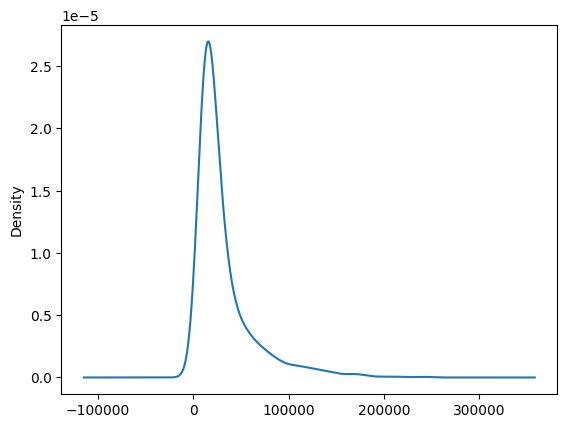

In [99]:
df['price'].plot(kind='kde')

In [100]:
df['price'].skew()

2.5749408621561876

<Axes: xlabel='price'>

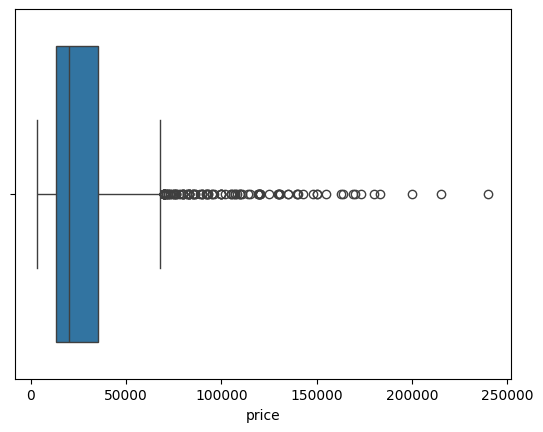

In [101]:
sns.boxplot(df,x='price')

In [102]:
# Calculate IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]['price']

,price
14,114990
27,129990
29,69999
37,91999
56,74999
...,...
955,214990
958,169000
975,69990
977,70990


## `Rating`

`- column in your dataset is negatively skewed (left-skewed), meaning that the tail on the left side of the distribution is longer or fatter than the right side.`

`- no outliers present in this column`

In [103]:
df['rating'].describe()

,rating
count,878.000000
mean,78.247153
std,7.399757
min,60.000000
25%,74.000000
50%,80.000000
75%,84.000000
max,89.000000


In [104]:
px.histogram(df,x='rating',nbins=10)

<Axes: ylabel='Density'>

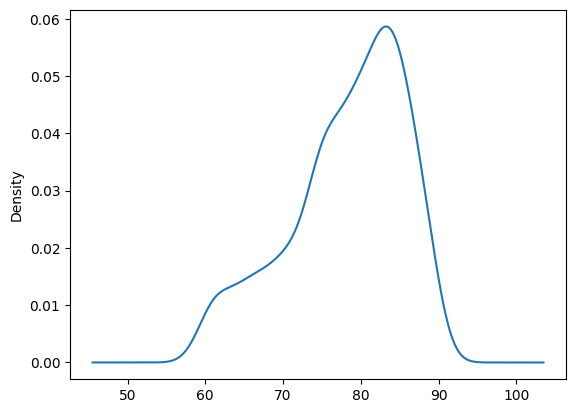

In [105]:
df['rating'].plot(kind='kde')

In [106]:
df['rating'].skew()

-0.6987763352410488

<Axes: xlabel='rating'>

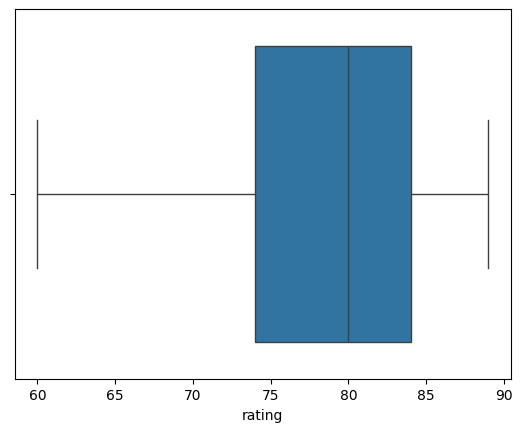

In [107]:
sns.boxplot(df,x='rating')

In [108]:
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Identify outliers
df[(df['rating'] < (Q1 - 1.5 * IQR)) | (df['rating'] > (Q3 + 1.5 * IQR))]

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version


## `has_5G,has_nfc,has_IR_Blaster`

- `5G is becoming common `
- `NFC is a standard feature on most devices.`
- `IR Blaster is a relatively rare feature, included only in a small subset of devices.`

array([[<Axes: title={'center': 'has_5G'}>,
        <Axes: title={'center': 'has_nfc'}>],
       [<Axes: title={'center': 'has_IR_Blaster'}>, <Axes: >]],
      dtype=object)

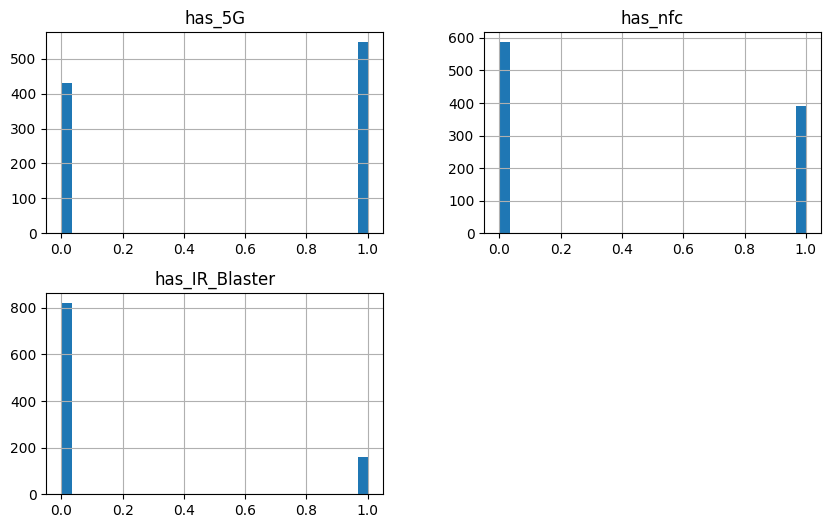

In [109]:
df[['has_5G', 'has_nfc', 'has_IR_Blaster']].hist(bins=30, figsize=(10, 6))

<Axes: ylabel='Density'>

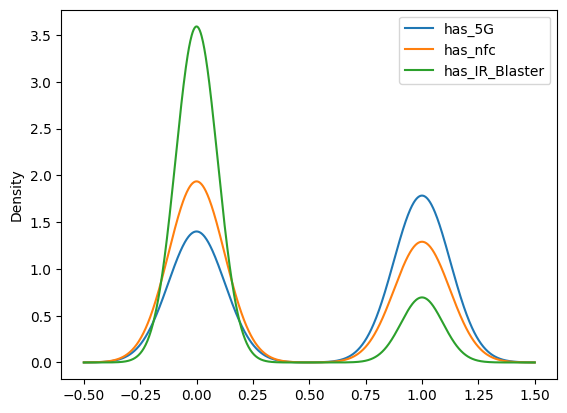

In [110]:
df[['has_5G','has_nfc','has_IR_Blaster']].plot(kind='kde')

In [111]:
df[['has_5G', 'has_nfc', 'has_IR_Blaster']].skew()

,0
has_5G,-0.242953
has_nfc,0.408874
has_IR_Blaster,1.835073


## `Core`

-- `Majority of smartphone have octacore processor`

In [112]:
df['Core'].unique()

array([8, 6, 4])

In [113]:
px.histogram(df,x='Core',nbins=3,title='Cores In  SmartPhone Processors')

<Axes: ylabel='Density'>

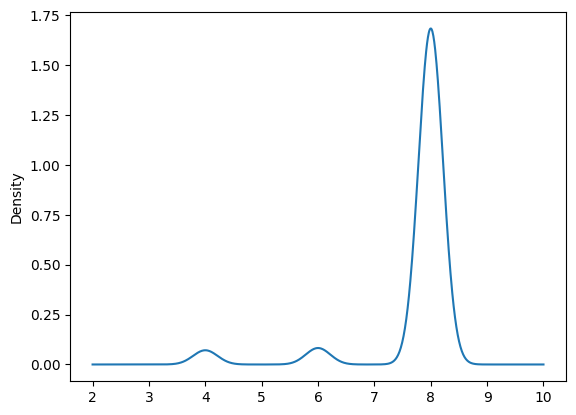

In [114]:
df['Core'].plot(kind='kde')

## `RAM & ROM`

In [115]:
df.loc[436,'RAM']='4'
df.loc[479,'RAM']='12'
df.loc[741,'RAM']='4'

<ipython-input-115-f0518c175eb9>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [116]:
df.drop([482],inplace=True)

In [117]:
df['RAM'].describe()

,RAM
count,979
unique,11
top,8
freq,338


In [118]:
df['RAM'].value_counts()

,count
RAM,
8,338
6,234
4,215
12,85
3,54
2,32
16,9
1,7
18,2


In [119]:
df['RAM'].unique()

array([12, 6, 4, 8, 3, 16, 2, 18, 1, '4', '12'], dtype=object)

In [120]:
px.histogram(df,x='RAM',nbins=4,title='RAM In  SmartPhones')

In [121]:
df['RAM']=df['RAM'].astype(int)

<Axes: ylabel='Density'>

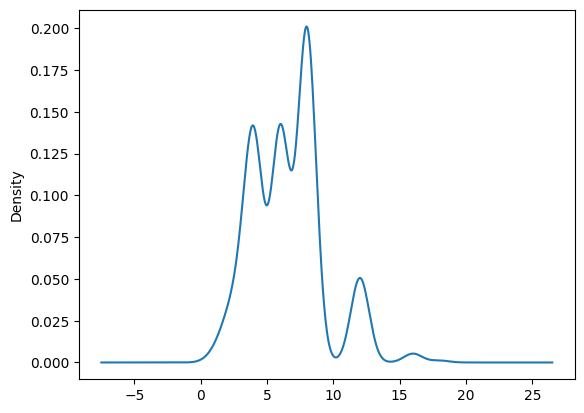

In [122]:
df['RAM'].plot(kind='kde')

In [123]:
df['RAM'].skew()

0.7472940906552207

<Axes: xlabel='RAM'>

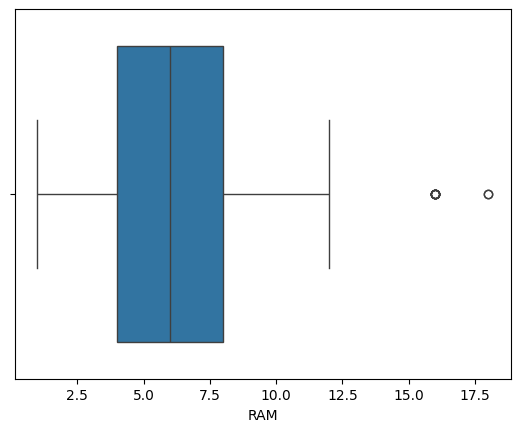

In [124]:
sns.boxplot(df,x='RAM')

In [125]:
# Calculate Q1 and Q3 for RAM
Q1_RAM = df['RAM'].quantile(0.25)
Q3_RAM = df['RAM'].quantile(0.75)

# Calculate IQR for RAM
IQR_RAM = Q3_RAM - Q1_RAM

# Identify outliers for RAM
df[(df['RAM'] < (Q1_RAM - 1.5 * IQR_RAM)) | (df['RAM'] > (Q3_RAM + 1.5 * IQR_RAM))]


,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version
17,OPPO,OPPO Reno 9 Pro Plus,45999,86.0,1,1,0,Snapdragon,3.2 GHz Processor,8,16,256,4700.0,1,6.70,1080,2412,120,3,1,0,Memory Card Not Supported,Android,v13
118,TESLA,Tesla Pi Phone,69999,83.0,1,1,0,Octa,2.80 GHz Processor,8,16,512,5000.0,1,6.73,1080,2448,165,3,1,0,Memory Card Not Supported,Android,v13
141,OPPO,OPPO Reno 9 Pro 5G,39999,86.0,1,1,0,Dimensity,2.85 GHz Processor,8,16,256,4500.0,1,6.70,1080,2412,120,2,1,0,Memory Card Not Supported,Android,v13
278,ASUS,Asus ROG Phone 6 Pro 5G,89999,88.0,1,1,0,Snapdragon,3.2 GHz Processor,8,18,512,6000.0,1,6.78,1080,2448,165,3,1,0,Memory Card Not Supported,Android,v12
306,ONEPLUS,OnePlus 10T (16GB RAM + 256GB),55999,87.0,1,1,0,Snapdragon,3.2 GHz Processor,8,16,256,4800.0,1,6.70,1080,2412,120,3,1,0,Memory Card Not Supported,Android,v12
318,IQOO,iQOO 11 (16GB RAM + 256GB),64999,89.0,1,1,0,Snapdragon,3.2 GHz Processor,8,16,256,5000.0,1,6.78,1440,3200,144,3,1,0,Memory Card Not Supported,Android,v13
407,ASUS,Asus ROG Phone 7,75990,87.0,1,1,0,Snapdragon,3.2 GHz Processor,8,18,256,6000.0,1,6.80,1080,2448,165,3,1,0,Memory Card Not Supported,Android,v13
442,ASUS,Asus ROG Phone 6 Batman Edition,72999,88.0,1,1,0,Dimensity,3.2 GHz Processor,8,16,256,6000.0,1,6.78,1080,2448,165,3,1,0,Memory Card Not Supported,Android,v12
460,OPPO,OPPO Reno 10 Pro,42990,86.0,1,1,0,Dimensity,3.05 GHz Processor,8,16,256,5000.0,1,6.73,1080,2412,120,2,1,0,Memory Card Not Supported,Android,v13
702,ASUS,Asus ROG Phone 6D Ultimate,107990,NaN,1,1,0,Dimensity,3.2 GHz Processor,8,16,512,6000.0,1,6.78,1080,2448,165,3,1,0,Memory Card Not Supported,Android,12


In [126]:
df['ROM'].describe()

,ROM
count,979.000000
mean,135.825332
std,86.899368
min,1.000000
25%,64.000000
50%,128.000000
75%,128.000000
max,512.000000


In [127]:
df['ROM'].value_counts()

,count
ROM,
128,525
64,191
256,156
32,67
512,22
16,12
1,5
8,1


In [128]:
px.histogram(df,x='ROM',nbins=74,title='ROM In  SmartPhones')

<Axes: ylabel='Density'>

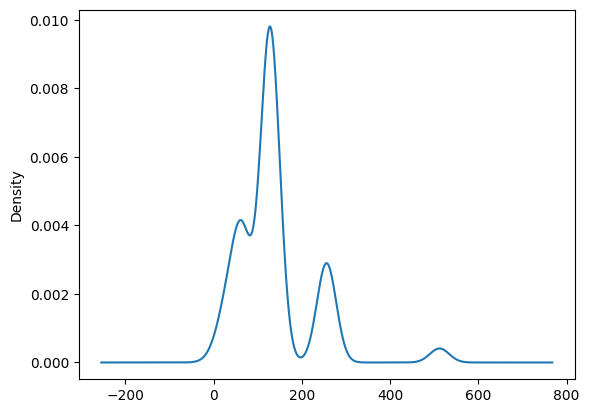

In [129]:
df['ROM'].plot(kind='kde')

In [130]:
df['ROM'].skew()

1.9686089438779086

<Axes: xlabel='ROM'>

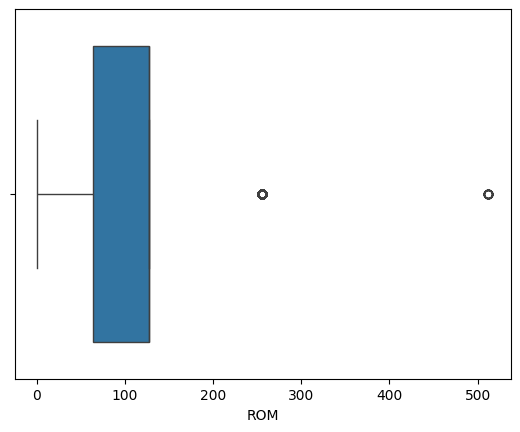

In [131]:
sns.boxplot(df,x='ROM')

In [132]:
# Calculate Q1 and Q3 for ROM
Q1_ROM = df['ROM'].quantile(0.25)
Q3_ROM = df['ROM'].quantile(0.75)

# Calculate IQR for ROM
IQR_ROM = Q3_ROM - Q1_ROM

# Identify outliers for ROM
df[(df['ROM'] < (Q1_ROM - 1.5 * IQR_ROM)) | (df['ROM'] > (Q3_ROM + 1.5 * IQR_ROM))]


,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version
0,ONEPLUS,OnePlus 11 5G,54999,89.0,1,1,0,Snapdragon,3.2 GHz Processor,8,12,256,5000.0,1,6.70,1440,3216,120,3,1,0,Memory Card Not Supported,Android,v13
7,XIAOMI,Xiaomi Redmi Note 12 Pro Plus,29999,86.0,1,0,1,Dimensity,2.6 GHz Processor,8,8,256,4980.0,1,6.67,1080,2400,120,3,1,0,Memory Card Not Supported,Android,v12
14,SAMSUNG,Samsung Galaxy S23 Ultra 5G,114990,NaN,1,1,0,Snapdragon,3.2 GHz Processor,8,8,256,5000.0,1,6.80,1440,3088,120,4,1,0,Memory Card Not Supported,Android,v13
17,OPPO,OPPO Reno 9 Pro Plus,45999,86.0,1,1,0,Snapdragon,3.2 GHz Processor,8,16,256,4700.0,1,6.70,1080,2412,120,3,1,0,Memory Card Not Supported,Android,v13
24,VIVO,Vivo V26 Pro,42990,87.0,1,1,0,Dimensity,3.2 GHz Processor,8,12,256,4800.0,1,6.70,1080,2400,120,3,1,0,Memory Card Not Supported,Android,v13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,XIAOMI,Xiaomi Civi 3,32990,86.0,1,1,1,Dimensity,3.1 GHz Processor,8,8,256,5000.0,1,6.70,1080,2400,120,3,2,0,Memory Card Not Supported,Android,v13
975,OPPO,Oppo Find X6,69990,89.0,1,1,0,Snapdragon,3.2 GHz Processor,8,8,256,4700.0,1,6.73,1080,2400,120,3,1,0,Memory Card Not Supported,Android,v12
977,GOOGLE,Google Pixel 8 Pro,70990,80.0,1,1,0,Google,3.0 GHz Processor,8,12,256,5000.0,1,6.73,1440,3120,120,3,1,0,Memory Card Not Supported,Android,v13
978,VIVO,Vivo X Fold 2,119990,NaN,1,1,0,Snapdragon,3.2 GHz Processor,8,12,256,4800.0,1,8.03,1916,2160,120,3,1,0,Memory Card Not Supported,Android,v12


## `other numeric columns`

-` About 85% of the smartphones in the dataset support fast charging (mean = 0.854)`

-`The median width is 1080 pixels, and the median height is 2400 pixels, which aligns with common resolutions such as Full HD+ (1080x2400).`

-`The average display refresh rate is about 92 Hz, indicating that many devices support higher refresh rates than the standard 60 Hz.`

-`most devices having either 2 or 3 rear cameras and 1 front camera`

-`Approximately 64% of the smartphones support expandable storage via a card slot (mean = 0.639).`


In [133]:
# Selecting the specified columns from the DataFrame
df[['battery_capacity', 'fast_charging_available', 'display_size(inches)',
                       'display_width', 'display_height', 'Display_Frequency',
                       'Number_of_rear_camera', 'Number_of_front_camera', 'card_supported']].describe()

,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported
count,979.000000,979.000000,979.000000,979.000000,979.00000,979.000000,979.000000,979.000000,979.000000
mean,4793.119510,0.853933,6.536915,1075.847804,2214.53524,92.289070,2.814096,1.029622,0.639428
std,1032.967001,0.353354,0.349309,290.313208,516.73268,28.984503,0.776815,0.169629,0.480412
min,1821.000000,0.000000,3.540000,480.000000,480.00000,60.000000,1.000000,1.000000,0.000000
25%,4500.000000,1.000000,6.500000,1080.000000,1612.00000,60.000000,2.000000,1.000000,0.000000
50%,5000.000000,1.000000,6.580000,1080.000000,2400.00000,90.000000,3.000000,1.000000,1.000000
75%,5000.000000,1.000000,6.670000,1080.000000,2408.00000,120.000000,3.000000,1.000000,1.000000
max,22000.000000,1.000000,8.030000,2460.000000,3840.00000,240.000000,4.000000,2.000000,1.000000


## `Steps of doing Univariate Analysis on Categorical columns`
Descriptive Statistics: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

Visualizations: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

Missing Values: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

Conclusion: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

## `Brand_name`

In [134]:
df['Brand_name'].describe()

,Brand_name
count,979
unique,46
top,XIAOMI
freq,133


In [135]:
temp_df=df['Brand_name'].value_counts().sort_values(ascending=False).head(10)
temp_df=temp_df.reset_index()
temp_df

,Brand_name,count
0,XIAOMI,133
1,SAMSUNG,132
2,VIVO,111
3,REALME,97
4,OPPO,88
5,MOTOROLA,52
6,APPLE,46
7,ONEPLUS,42
8,POCO,41
9,TECNO,33


In [136]:
fig=px.bar(temp_df,color='Brand_name',text_auto=True,title='top 10 brand with most number of smartphone available')
fig.update_xaxes(showticklabels=False)
fig.show()

In [137]:
fig=px.pie(temp_df,names='Brand_name',values='count')
fig.update_traces(textinfo='label+percent', textposition='inside')

# Show the figure
fig.show()

In [138]:
fig=px.pie(df,names='Brand_name')
fig.update_traces(textinfo='label+percent', textposition='inside')

# Show the figure
fig.show()

## `processor_name`
-`Snapdragon processors dominate the smartphone market in the dataset, holding a 41.1% , followed by Helio at 20.3% and Dimensity at 18.1%, with other processors having smaller shares.`

In [139]:
df['processor_name'].value_counts().head(10)

,count
processor_name,
Snapdragon,402
Helio,199
Dimensity,177
Exynos,49
Bionic,39
Unisoc,25
Tiger,24
Octa,14
Google,9


<Axes: xlabel='processor_name'>

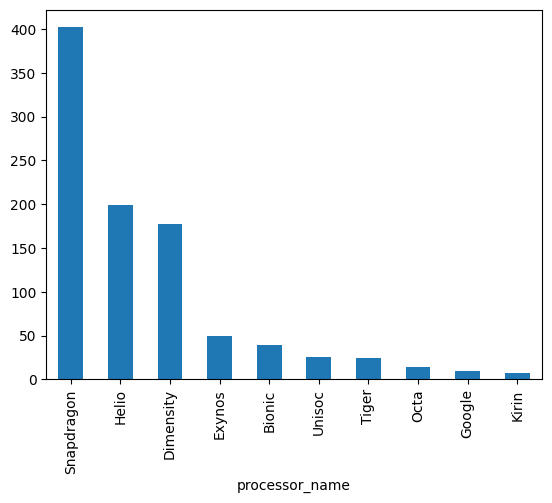

In [140]:
df['processor_name'].value_counts().head(10).plot(kind='bar')

In [141]:
temp_df = df['processor_name'].value_counts().head(10)

# Convert the Series to a DataFrame by resetting the index
temp_df = temp_df.reset_index()

# Optionally, rename the columns for clarity
temp_df.columns = ['processor_name', 'count']
px.bar(temp_df,x='processor_name',y='count',color='processor_name',text_auto=True)

In [142]:
fig=px.pie(temp_df,names='processor_name',values='count')
fig.update_traces(textinfo='label+percent',textposition='inside')
fig.show()

In [143]:
fig=px.pie(df,names='processor_name')
fig.update_traces(textinfo='label+percent',textposition='inside')
fig.show()

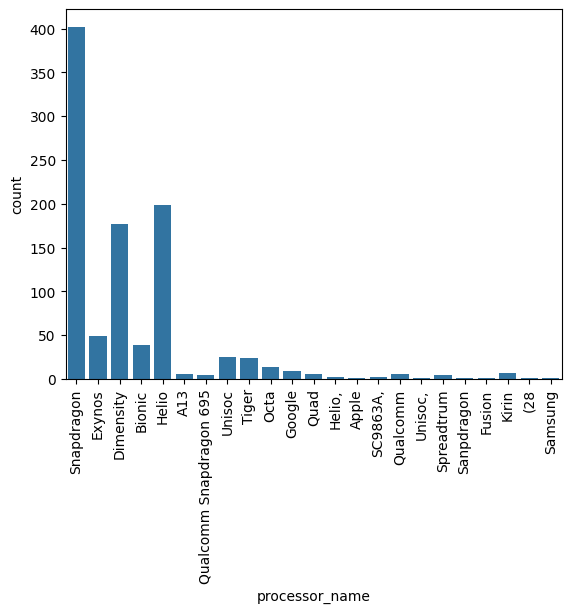

In [144]:
sns.countplot(data=df, x='processor_name')

# Show the plot
plt.xticks(rotation=90)
plt.show()

##`os_name`
- `Android overwhelmingly dominates the smartphone market in the dataset, with 93.3% device, followed by iOS at 4.7%, while other OSs have minimal representation.`

In [145]:
df['os_name'].value_counts()

,count
os_name,
Android,913
iOS,46
HarmonyOS,5
ColorOS,3
EMUI,3
One UI,2
Royole FlexPai OS,2
Hongmeng,2
Harmony,2


In [146]:
px.bar(df['os_name'].value_counts().reset_index(),x='os_name',y='count',color='os_name',text_auto=True)

In [147]:
fig=px.pie(df['os_name'].value_counts().reset_index(),names='os_name',values='count')
fig.update_traces(textinfo='label+percent',textposition='inside')
fig.show()

## `extended_upto`

-`The majority of smartphones in this dataset either don't support memory cards (36.1%) or offer high-capacity options like 1TB (29.3%), with various other storage capacities available in smaller proportions.`

In [148]:
df['extended_upto'].value_counts()

,count
extended_upto,
Memory Card Not Supported,353
1 TB,287
256 GB,162
512 GB,153
128 GB,10
2 TB,8
32 GB,3
64 GB,3


In [149]:
px.bar(df['extended_upto'].value_counts().reset_index(),x='extended_upto',y='count',color='extended_upto',text_auto=True)

In [150]:
df['extended_upto'].unique()

array(['Memory Card Not Supported', '1\u2009TB', '256\u2009GB',
       '512\u2009GB', '2\u2009TB', '128\u2009GB', '32\u2009GB',
       '64\u2009GB'], dtype=object)

In [151]:
fig=px.pie(df['extended_upto'].value_counts().reset_index(),names='extended_upto',values='count')
fig.update_traces(textinfo='label+percent',textposition='inside')
fig.show()

## `univariate analysis on mixed type column can be done if you can convert it to category type columns.`



### `processor_freq`
--`The most common processor speeds are 2 GHz (19.4%), 2.2 GHz (18%), and 2.4 GHz (17%), accounting for over half of the devices`

In [152]:
df['processor_frequency'].value_counts()

,count
processor_frequency,
2 GHz Processor,146
2.2 GHz Processor,135
2.4 GHz Processor,128
3.2 GHz Processor,94
2.3 GHz Processor,86
3 GHz Processor,53
2.84 GHz Processor,36
2.05 GHz Processor,28
1.8 GHz Processor,23


In [153]:
px.bar(df['processor_frequency'].value_counts().reset_index().head(10),x='processor_frequency',y='count',
       color='processor_frequency',text_auto=True)

In [154]:
px.bar(df['processor_frequency'].value_counts().reset_index(),x='processor_frequency',y='count',
       color='processor_frequency',text_auto=True)

In [155]:
fig=px.pie(df['processor_frequency'].value_counts().reset_index().head(10),names='processor_frequency',values='count')
fig.update_traces(textinfo='label+percent',textposition='inside')
fig.show()

## `Steps of doing Bivariate Analysis`
`Select 2 cols
Understand type of relationship`

`Numerical - Numerical `

a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots

b. Check correlation coefficent to check linear relationship

`Numerical - Categorical` - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.

a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots

`Categorical - Categorical `

a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.

b. You can plots like heatmap, stacked barplots, treemaps.

## `price and rating`

In [156]:
px.scatter(df,y='price',x='rating',color='model',hover_name='Brand_name')

<Axes: xlabel='rating', ylabel='price'>

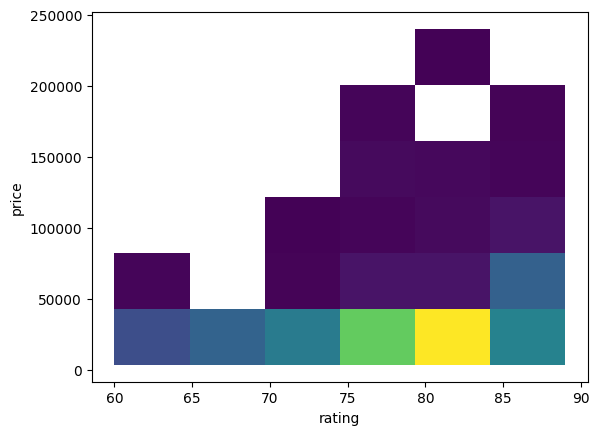

In [157]:
sns.histplot(df,x='rating',y='price',bins=6,cmap='viridis')

<Axes: xlabel='rating', ylabel='price'>

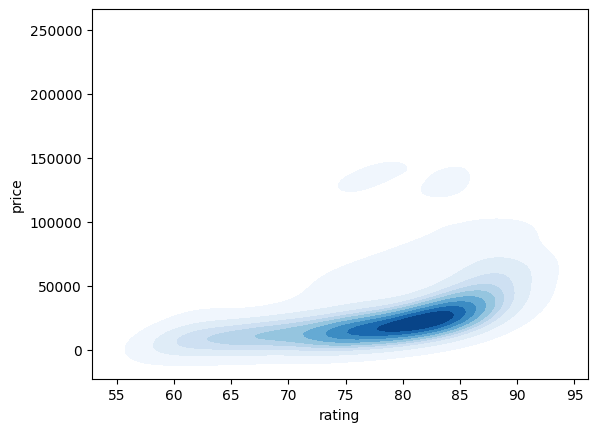

In [158]:
sns.kdeplot(data=df, x='rating', y='price', cmap='Blues', fill=True)

In [159]:
df['price'].corr(df['rating'])

0.42277605741428215

## `price & has_5g`

- `its preety obv 5G phone have higher avg price`

<Axes: xlabel='has_5G', ylabel='price'>

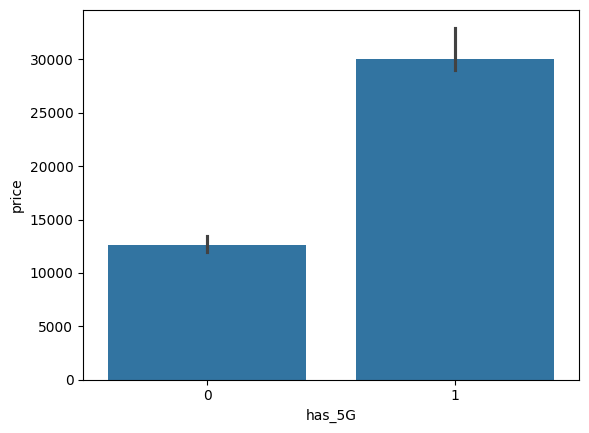

In [160]:
sns.barplot(df,y='price',x='has_5G',estimator=np.median)

In [161]:
df['price'].corr(df['has_5G'])

0.4260079680654148

## `price and nfc`

- ` smartphone with nfc have higher avg price`

<Axes: xlabel='has_nfc', ylabel='price'>

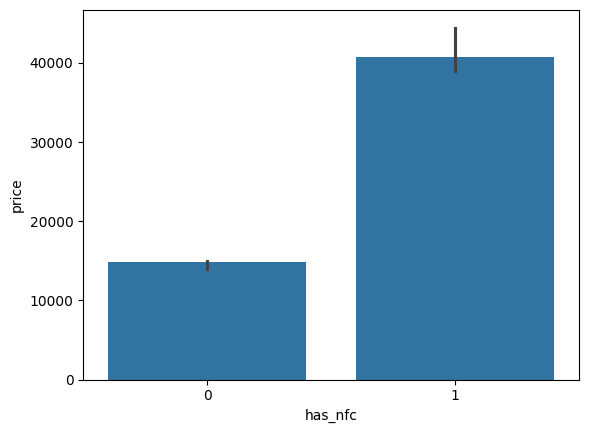

In [162]:
sns.barplot(df,y='price',x='has_nfc',estimator=np.median)

In [163]:
df['price'].corr(df['has_nfc'])

0.5571552387279023

## `price & has_IR_Blaster`

- `phone which have has_IR_Blaster or which dont have same avg price`

In [164]:
df.columns

Index(['Brand_name', 'model', 'price', 'rating', 'has_5G', 'has_nfc',
       'has_IR_Blaster', 'processor_name', 'processor_frequency', 'Core',
       'RAM', 'ROM', 'battery_capacity', 'fast_charging_available',
       'display_size(inches)', 'display_width', 'display_height',
       'Display_Frequency', 'Number_of_rear_camera', 'Number_of_front_camera',
       'card_supported', 'extended_upto', 'os_name', 'os_version'],
      dtype='object')

<Axes: xlabel='has_IR_Blaster', ylabel='price'>

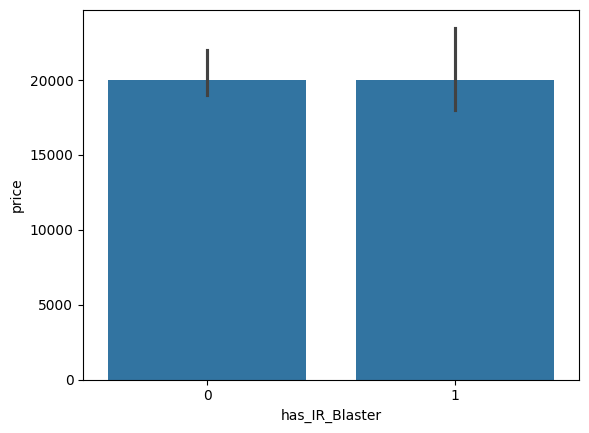

In [165]:
sns.barplot(df,y='price',x='has_IR_Blaster',estimator=np.median)

In [166]:
df['price'].corr(df['has_IR_Blaster'])

-0.005158651447310574

## `price & processor_name`

- ` kirin,bionic,google and A13 have high range price values`

In [167]:
px.scatter(df,y='price',x='processor_name',color='processor_name')

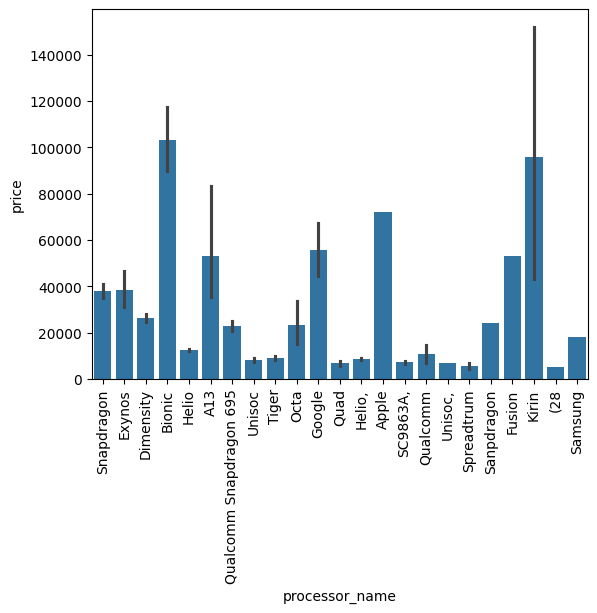

In [168]:
sns.barplot(df,y='price',x='processor_name')
plt.xticks(rotation=90)
plt.show()

## `price & core`

-- ` hexacore smartphone are more costly then octacore`
-- ` iphone uses hexa core processor only`

In [169]:
px.scatter(df,y='price',x='Core',color='Brand_name',size='Core')

In [170]:
df[df['Brand_name']=='LYF']

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version
474,LYF,Lyf Earth 1,3990,60.0,0,0,0,Snapdragon,1.5 GHz Processor,8,3,32,3500.0,0,5.5,1080,1920,60,2,1,1,64 GB,Android,v5.1.1 (Lollipop)
895,LYF,Lyf Earth 2,3890,NaN,0,0,0,Snapdragon,1.5 GHz Processor,8,3,32,2500.0,0,5.0,1080,1920,60,1,1,1,64 GB,Android,v5.1.1 (Lollipop)


<Axes: xlabel='Core', ylabel='price'>

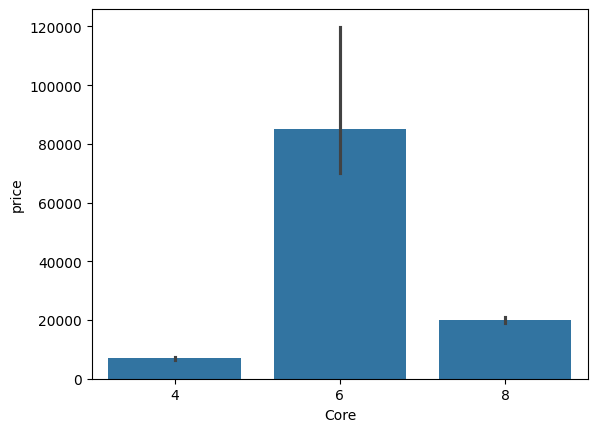

In [171]:
sns.barplot(df,y='price',x='Core',estimator=np.median)

In [172]:
pd.crosstab(df['Core'],df['os_name'])

os_name,Android,ColorOS,EMUI,Harmony,HarmonyOS,Hongmeng,One UI,Pragati,Royole FlexPai OS,iOS
Core,,,,,,,,,,
4,34,0,0,0,1,0,0,1,0,1
6,0,0,0,0,0,0,0,0,0,44
8,879,3,3,2,4,2,2,0,2,1


In [173]:
df['price'].corr(df['Core'])

-0.08829785032425469

## `price and processor speed`

In [174]:
df.head()

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version
0,ONEPLUS,OnePlus 11 5G,54999,89.0,1,1,0,Snapdragon,3.2 GHz Processor,8,12,256,5000.0,1,6.70,1440,3216,120,3,1,0,Memory Card Not Supported,Android,v13
1,ONEPLUS,OnePlus Nord CE 2 Lite 5G,19989,81.0,1,0,0,Snapdragon,2.2 GHz Processor,8,6,128,5000.0,1,6.59,1080,2412,120,3,1,1,1 TB,Android,v12
2,SAMSUNG,Samsung Galaxy A14 5G,16499,75.0,1,0,0,Exynos,2.4 GHz Processor,8,4,64,5000.0,1,6.60,1080,2408,90,3,1,1,1 TB,Android,v13
3,MOTOROLA,Motorola Moto G62 5G,14999,81.0,1,0,0,Snapdragon,2.2 GHz Processor,8,6,128,5000.0,1,6.55,1080,2400,120,3,1,1,1 TB,Android,v12
4,REALME,Realme 10 Pro Plus,24999,82.0,1,0,0,Dimensity,2.6 GHz Processor,8,6,128,5000.0,1,6.70,1080,2412,120,3,1,0,Memory Card Not Supported,Android,v13


In [175]:
df['processor_frequency']=df['processor_frequency'].str.strip()

In [176]:
df['processor_frequency']=df['processor_frequency'].str.split('G').str.get(0)

In [177]:
sorted_processor_frequency = df['processor_frequency'].sort_values(ascending=True)
fig = px.scatter(df, y='price', x=sorted_processor_frequency, color='Brand_name')

# Show the plot
fig.show()

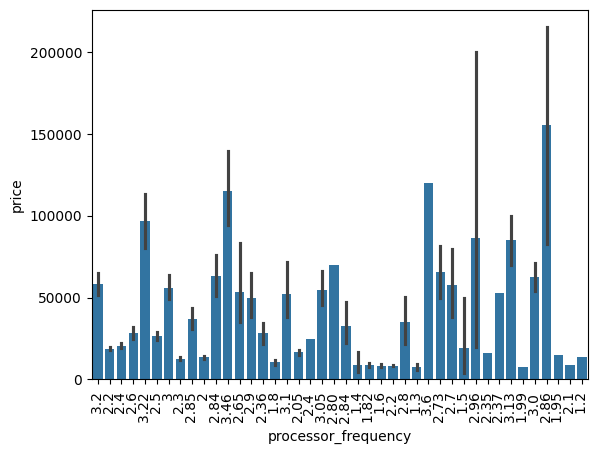

In [178]:
sns.barplot(df,x='processor_frequency',y='price')
plt.xticks(rotation=90)
plt.show()

In [179]:
df['price'].corr(df['processor_frequency'])

0.6692585502692331

## `price & RAM`
- `18 GB have highest 50% value but its frequency is low and both 12,16 have 2nd highest 50% value.`
- ` relation is some what +ve linear`

In [180]:
fig = px.scatter(df, y='price', x='RAM', color='Brand_name')
# Show the plot
fig.show()

<Axes: xlabel='RAM', ylabel='price'>

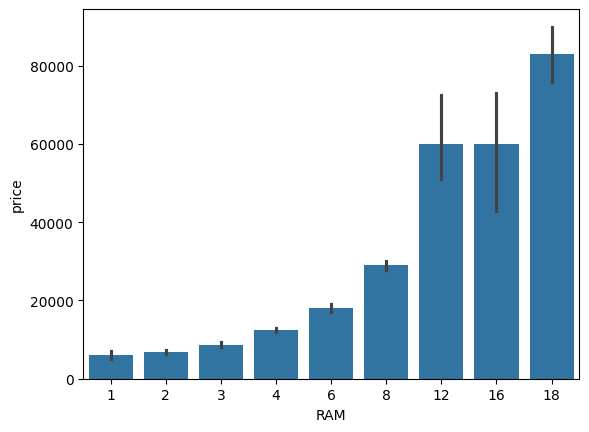

In [181]:
sns.barplot(df,y='price',x='RAM',estimator=np.median)

In [182]:
df['price'].corr(df['RAM'])

0.5145185934610855

## `price & ROM`
- `relation btw price & ROM preety much +ve linear`
- `best column to predict price `

In [183]:
df.loc[df['ROM']==1,'ROM']=1024

In [184]:
df[df['ROM']==1]

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version


In [185]:
fig = px.scatter(df, y='price', x='ROM', color='Brand_name')
# Show the plot
fig.show()

<Axes: xlabel='ROM', ylabel='price'>

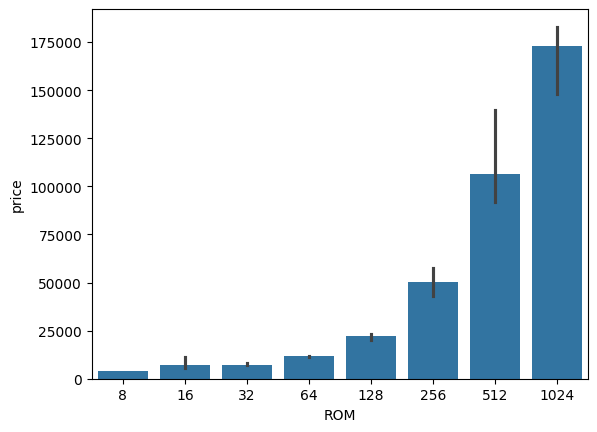

In [186]:
sns.barplot(df,x='ROM',y='price',estimator=np.median)

In [187]:
df['price'].corr(df['ROM'])

0.7070635039577935

In [188]:
df.head()

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version
0,ONEPLUS,OnePlus 11 5G,54999,89.0,1,1,0,Snapdragon,3.2,8,12,256,5000.0,1,6.70,1440,3216,120,3,1,0,Memory Card Not Supported,Android,v13
1,ONEPLUS,OnePlus Nord CE 2 Lite 5G,19989,81.0,1,0,0,Snapdragon,2.2,8,6,128,5000.0,1,6.59,1080,2412,120,3,1,1,1 TB,Android,v12
2,SAMSUNG,Samsung Galaxy A14 5G,16499,75.0,1,0,0,Exynos,2.4,8,4,64,5000.0,1,6.60,1080,2408,90,3,1,1,1 TB,Android,v13
3,MOTOROLA,Motorola Moto G62 5G,14999,81.0,1,0,0,Snapdragon,2.2,8,6,128,5000.0,1,6.55,1080,2400,120,3,1,1,1 TB,Android,v12
4,REALME,Realme 10 Pro Plus,24999,82.0,1,0,0,Dimensity,2.6,8,6,128,5000.0,1,6.70,1080,2412,120,3,1,0,Memory Card Not Supported,Android,v13


## `price & battery_capacity`
-`Battery capacity shows a weak correlation with smartphone prices, with diverse options across price points and a concentration of devices in the 2500-5000 mAh range, suggesting other factors significantly influence pricing in the smartphone market.`

In [189]:
fig = px.scatter(df, y='price', x='battery_capacity', color='Brand_name')
# Show the plot
fig.show()

In [190]:
df['battery_capacity'].nunique()

93

<Axes: xlabel='battery_capacity', ylabel='price'>

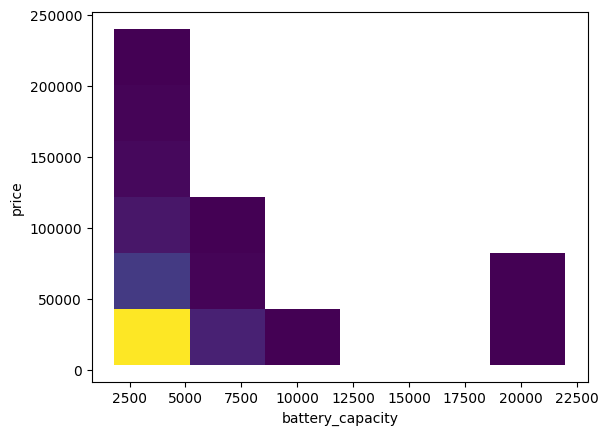

In [191]:
sns.histplot(df,x='battery_capacity',y='price',bins=6,cmap='viridis')

<Axes: xlabel='battery_capacity', ylabel='price'>

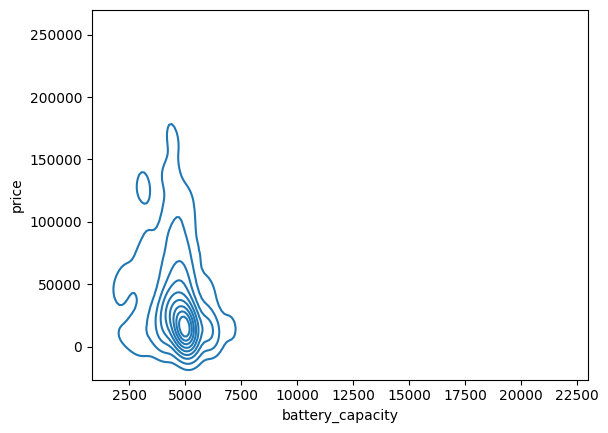

In [192]:
sns.kdeplot(df,x='battery_capacity',y='price')

In [193]:
df['price'].corr(df['battery_capacity'])

-0.16497024973758576

## ` from this we can say that amoung all these only 'display_width','display_height', 'Display_Frequency'`

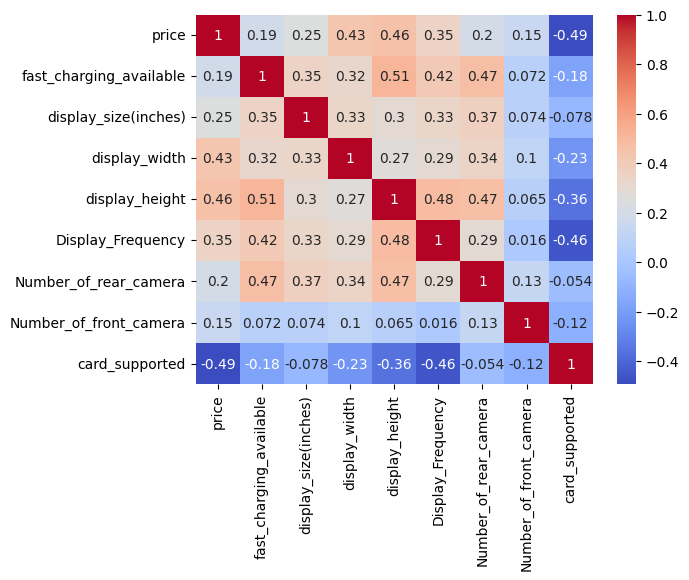

In [194]:
columns = ['price', 'fast_charging_available', 'display_size(inches)', 'display_width',
           'display_height', 'Display_Frequency', 'Number_of_rear_camera',
           'Number_of_front_camera', 'card_supported']
corr_matrix = df[columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [195]:
column=['price' ,'display_width',
           'display_height', 'Display_Frequency']

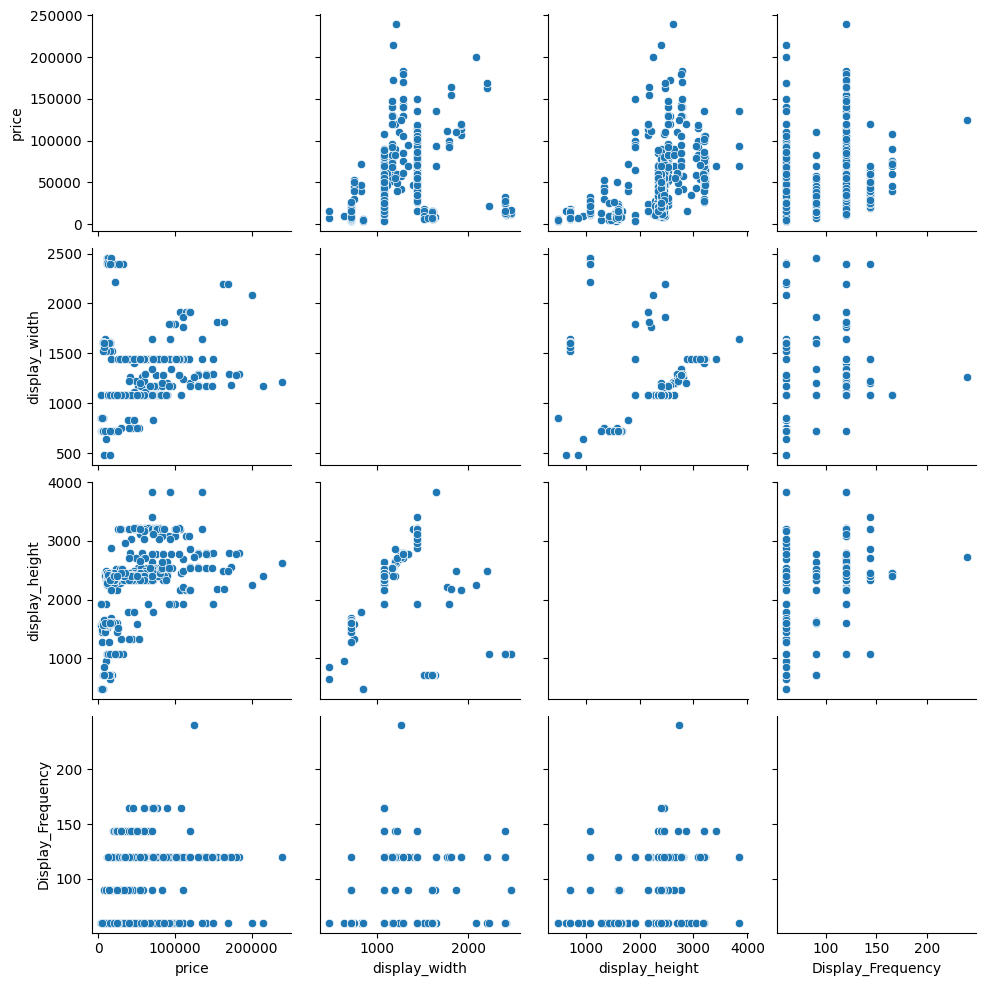

In [196]:
sns.pairplot(df[column], diag_kind='scatter')
# Show the plot
plt.show()

`ROM (0.707): Higher ROM is strongly associated with a higher price.
has_nfc (0.557): Presence of NFC is moderately correlated with a higher price.
RAM (0.515): Higher RAM is moderately correlated with a higher price
and processor_frequency`

In [197]:
df['processor_frequency'].unique()

array(['3.2\u2009', '2.2\u2009', '2.4\u2009', '2.6\u2009', '3.22\u2009',
       '2.5\u2009', '3\u2009', '2.3\u2009', '2.85\u2009', '2\u2009',
       '2.84\u2009', '3.46 ', '2.65\u2009', '2.9\u2009', '2.36\u2009',
       '1.8\u2009', '3.1\u2009', '2.05\u2009', '2.4 ', '3.05\u2009',
       '2.80 ', '2.84 ', '1.4\u2009', '1.82\u2009', '1.6\u2009', '2.2 ',
       '2.8\u2009', '1.3\u2009', '3.6 ', '2.73\u2009', '2.7\u2009',
       '1.5\u2009', '2.96\u2009', '2.35\u2009', '2.37\u2009',
       '3.13\u2009', '1.99\u2009', '3.0 ', '2.86\u2009', '1.95\u2009',
       '2.1\u2009', '1.2\u2009'], dtype=object)

In [198]:
df['processor_frequency']=df['processor_frequency'].str.strip().replace('\u2009', '').astype(float)

In [199]:
df['os_name'].unique()

array(['Android', 'iOS', 'HarmonyOS', 'ColorOS', 'One UI',
       'Royole FlexPai OS', 'Hongmeng', 'Pragati', 'Harmony', 'EMUI'],
      dtype=object)

In [200]:
# os_list = ['Android', 'iOS', 'HarmonyOS', 'ColorOS', 'One UI',
#            'Royole FlexPai OS', 'Hongmeng', 'Pragati', 'Harmony', 'EMUI']

# # Create a dictionary to map each OS to an integer
# os_mapping = {os_name: idx for idx, os_name in enumerate(os_list)}
# os_mapping

In [201]:
# df['os_name']=df['os_name'].map(os_mapping)

In [202]:
temp_df=df.select_dtypes('number')

In [203]:
temp_df.corr()['price'].sort_values(ascending=False)

,price
price,1.000000
ROM,0.707064
processor_frequency,0.669259
has_nfc,0.557155
RAM,0.514519
display_height,0.456481
display_width,0.432107
has_5G,0.426008
rating,0.422776
Display_Frequency,0.348017


<Axes: xlabel='os_name', ylabel='price'>

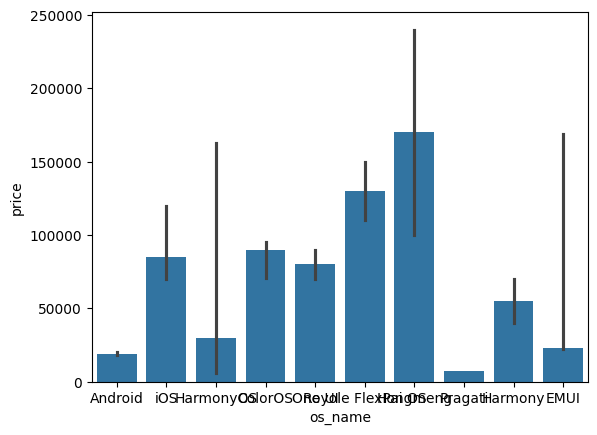

In [204]:
sns.barplot(df,x='os_name',y='price',estimator=np.median)

In [205]:
x=[2,6,8]
df[df['os_name'].isin(x)]

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version


In [206]:
df.select_dtypes('O')

,Brand_name,model,processor_name,extended_upto,os_name,os_version
0,ONEPLUS,OnePlus 11 5G,Snapdragon,Memory Card Not Supported,Android,v13
1,ONEPLUS,OnePlus Nord CE 2 Lite 5G,Snapdragon,1 TB,Android,v12
2,SAMSUNG,Samsung Galaxy A14 5G,Exynos,1 TB,Android,v13
3,MOTOROLA,Motorola Moto G62 5G,Snapdragon,1 TB,Android,v12
4,REALME,Realme 10 Pro Plus,Dimensity,Memory Card Not Supported,Android,v13
...,...,...,...,...,...,...
979,MOTOROLA,Motorola Moto Edge S30 Pro,Snapdragon,Memory Card Not Supported,Android,v12
980,HONOR,Honor X8 5G,Snapdragon,1 TB,Android,v11.0
981,POCO,POCO X4 GT 5G (8GB RAM + 256GB),Dimensity,Memory Card Not Supported,Android,v12
982,MOTOROLA,Motorola Moto G91 5G,Snapdragon,1 TB,Android,v12


## `Categorical - Categorical`

In [207]:
fig=px.treemap(df,path=['Brand_name','model','os_name'],values='price',hover_data={
        'rating': True,
        'has_5G': True,
        'has_nfc': True,
        'processor_name': True,
        'RAM': True,
        'ROM': True,
        'battery_capacity': True,
        'display_size(inches)': True,
        'os_version': True
    },color='Brand_name', color_discrete_map={'Brand_name': 'colorscale'
    },
    title="Smartphone Price Distribution by Brand, Model"
)
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    treemapcolorway=["#FFB6C1", "#87CEFA", "#9370DB", "#3CB371", "#FFD700", "#FF6347"],
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)

fig.show()

In [208]:
df[(df['Brand_name']=='VIVO') & (df['price']>100000)]

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name,os_version
98,VIVO,Vivo X Fold 5G,106990,NaN,1,1,0,Snapdragon,3.0,8,12,256,4600.0,1,8.03,1916,2160,120,4,1,0,Memory Card Not Supported,Android,v12
478,VIVO,Vivo X Fold Plus,113990,NaN,1,1,0,Snapdragon,3.2,8,12,256,4730.0,1,8.03,1916,2160,120,4,2,0,Memory Card Not Supported,Android,v12
920,VIVO,Vivo X Fold 5G (12GB RAM + 512GB),118990,NaN,1,1,0,Snapdragon,3.0,8,12,512,4600.0,1,8.03,1916,2160,120,4,1,0,Memory Card Not Supported,Android,v12
978,VIVO,Vivo X Fold 2,119990,NaN,1,1,0,Snapdragon,3.2,8,12,256,4800.0,1,8.03,1916,2160,120,3,1,0,Memory Card Not Supported,Android,v12


In [209]:
temp_df.corr()['rating'].sort_values(ascending=False)

,rating
rating,1.000000
RAM,0.757603
display_height,0.688422
Display_Frequency,0.613530
has_5G,0.598790
fast_charging_available,0.542833
processor_frequency,0.541488
Number_of_rear_camera,0.515716
ROM,0.478358
has_nfc,0.473749


In [210]:
df.isna().sum()

,0
Brand_name,0
model,0
price,0
rating,101
has_5G,0
has_nfc,0
has_IR_Blaster,0
processor_name,0
processor_frequency,0
Core,0


## KNN on rating column to fill the nan values`

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 979 entries, 0 to 983
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand_name               979 non-null    object 
 1   model                    979 non-null    object 
 2   price                    979 non-null    int64  
 3   rating                   878 non-null    float64
 4   has_5G                   979 non-null    int64  
 5   has_nfc                  979 non-null    int64  
 6   has_IR_Blaster           979 non-null    int64  
 7   processor_name           979 non-null    object 
 8   processor_frequency      979 non-null    float64
 9   Core                     979 non-null    int64  
 10  RAM                      979 non-null    int64  
 11  ROM                      979 non-null    int64  
 12  battery_capacity         979 non-null    float64
 13  fast_charging_available  979 non-null    int64  
 14  display_size(inches)     979 no

In [218]:
from sklearn.impute import KNNImputer
numerical_columns = ['price', 'has_5G', 'has_nfc', 'has_IR_Blaster',
                     'processor_frequency', 'Core', 'RAM', 'ROM',
                     'battery_capacity', 'fast_charging_available',
                     'display_size(inches)', 'display_width', 'display_height',
                     'Display_Frequency', 'Number_of_rear_camera',
                     'Number_of_front_camera', 'card_supported',
                     'extended_upto', 'rating']

df_impute = df[numerical_columns]

# Apply KNN Imputer
imputor = KNNImputer(n_neighbors=5)
df_imputed = imputor.fit_transform(df_impute)
df_imputed = pd.DataFrame(df_imputed, columns=numerical_columns)

# Update the original 'rating' column
df['rating'] = df_imputed['rating']

In [213]:
df.drop('os_version',inplace=True,axis=1)

In [214]:
df.loc[df['extended_upto']=='Memory Card Not Supported','extended_upto']=0

In [215]:
def storage_to_gb(storage_str):
    storage_str = str(storage_str).replace(' ', '') # Remove non-breaking space
    if 'TB' in storage_str:
        value = float(storage_str.replace('TB', '').strip())
        return value * 1024
    elif 'GB' in storage_str:
        return float(storage_str.replace('GB', '').strip())
    else:
        return 0  # Assuming '0' is 0 GB

In [216]:
df['extended_upto']=df['extended_upto'].apply(storage_to_gb)

In [217]:
df['extended_upto'].value_counts()

,count
extended_upto,
0.0,353
1024.0,287
256.0,162
512.0,153
128.0,10
2048.0,8
32.0,3
64.0,3


In [219]:
df['extended_upto']=df['extended_upto'].astype(int)

In [220]:
df['os_name'].value_counts()

,count
os_name,
Android,913
iOS,46
HarmonyOS,5
ColorOS,3
EMUI,3
One UI,2
Royole FlexPai OS,2
Hongmeng,2
Harmony,2


In [221]:
x=['HarmonyOS', 'ColorOS', 'EMUI', 'One UI', 'Royole FlexPai OS', 'Hongmeng', 'Harmony', 'Pragati']
df.loc[df['os_name'].isin(x),'os_name']='Others'

In [222]:
df['processor_name'].value_counts()

,count
processor_name,
Snapdragon,402
Helio,199
Dimensity,177
Exynos,49
Bionic,39
Unisoc,25
Tiger,24
Octa,14
Google,9


In [223]:
df.loc[df['processor_name']=='(28','processor_name']='Mediatek MT6739 (28 nm)'

In [224]:
df.select_dtypes('O')

,Brand_name,model,processor_name,os_name
0,ONEPLUS,OnePlus 11 5G,Snapdragon,Android
1,ONEPLUS,OnePlus Nord CE 2 Lite 5G,Snapdragon,Android
2,SAMSUNG,Samsung Galaxy A14 5G,Exynos,Android
3,MOTOROLA,Motorola Moto G62 5G,Snapdragon,Android
4,REALME,Realme 10 Pro Plus,Dimensity,Android
...,...,...,...,...
979,MOTOROLA,Motorola Moto Edge S30 Pro,Snapdragon,Android
980,HONOR,Honor X8 5G,Snapdragon,Android
981,POCO,POCO X4 GT 5G (8GB RAM + 256GB),Dimensity,Android
982,MOTOROLA,Motorola Moto G91 5G,Snapdragon,Android


In [225]:
df.dropna(inplace=True)

In [226]:
temp_df=pd.get_dummies(df,columns=['Brand_name','processor_name','os_name'],drop_first=True)

In [227]:
temp_df.drop('model',inplace=True,axis=1)

In [228]:
temp_df.corr()['price'].sort_values(ascending=False)

,price
price,1.000000
ROM,0.707640
processor_frequency,0.670151
has_nfc,0.558759
RAM,0.514793
processor_name_Bionic,0.469205
os_name_iOS,0.460076
display_height,0.456641
display_width,0.431888
has_5G,0.427948


In [229]:
temp_df.head()

,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,Brand_name_ASUS,Brand_name_BLACKVIEW,Brand_name_BLU,Brand_name_CAT,Brand_name_COLA,Brand_name_DOOGEE,Brand_name_DUOQIN,Brand_name_GIONEE,Brand_name_GOOGLE,Brand_name_HONOR,Brand_name_HUAWEI,Brand_name_IKALL,Brand_name_INFINIX,Brand_name_IQOO,Brand_name_ITEL,Brand_name_JIO,Brand_name_LAVA,Brand_name_LEECO,Brand_name_LEITZ,Brand_name_LENOVO,Brand_name_LETV,Brand_name_LG,Brand_name_LYF,Brand_name_MICROMAX,Brand_name_MOTOROLA,Brand_name_NOKIA,Brand_name_NOTHING,Brand_name_NUBIA,Brand_name_ONEPLUS,Brand_name_OPPO,Brand_name_OUKITEL,Brand_name_POCO,Brand_name_REALME,Brand_name_REDMI,Brand_name_ROYOLE,Brand_name_SAMSUNG,Brand_name_SHARP,Brand_name_SONY,Brand_name_TCL,Brand_name_TECNO,Brand_name_TESLA,Brand_name_VERTU,Brand_name_VIVO,Brand_name_XIAOMI,Brand_name_ZTE,processor_name_Apple,processor_name_Bionic,processor_name_Dimensity,processor_name_Exynos,processor_name_Fusion,processor_name_Google,processor_name_Helio,"processor_name_Helio,",processor_name_Kirin,processor_name_Mediatek MT6739 (28 nm),processor_name_Octa,processor_name_Quad,processor_name_Qualcomm,processor_name_Qualcomm Snapdragon 695,"processor_name_SC9863A,",processor_name_Samsung,processor_name_Sanpdragon,processor_name_Snapdragon,processor_name_Spreadtrum,processor_name_Tiger,processor_name_Unisoc,"processor_name_Unisoc,",os_name_Others,os_name_iOS
0,54999,89.0,1,1,0,3.2,8,12,256,5000.0,1,6.70,1440,3216,120,3,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,19989,81.0,1,0,0,2.2,8,6,128,5000.0,1,6.59,1080,2412,120,3,1,1,1024,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,16499,75.0,1,0,0,2.4,8,4,64,5000.0,1,6.60,1080,2408,90,3,1,1,1024,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,14999,81.0,1,0,0,2.2,8,6,128,5000.0,1,6.55,1080,2400,120,3,1,1,1024,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,24999,82.0,1,0,0,2.6,8,6,128,5000.0,1,6.70,1080,2412,120,3,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [230]:
df[df['rating'].isna()]

,Brand_name,model,price,rating,has_5G,has_nfc,has_IR_Blaster,processor_name,processor_frequency,Core,RAM,ROM,battery_capacity,fast_charging_available,display_size(inches),display_width,display_height,Display_Frequency,Number_of_rear_camera,Number_of_front_camera,card_supported,extended_upto,os_name


In [231]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 0 to 978
Data columns (total 88 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   price                                   974 non-null    int64  
 1   rating                                  974 non-null    float64
 2   has_5G                                  974 non-null    int64  
 3   has_nfc                                 974 non-null    int64  
 4   has_IR_Blaster                          974 non-null    int64  
 5   processor_frequency                     974 non-null    float64
 6   Core                                    974 non-null    int64  
 7   RAM                                     974 non-null    int64  
 8   ROM                                     974 non-null    int64  
 9   battery_capacity                        974 non-null    float64
 10  fast_charging_available                 974 non-null    int64  
 11

In [233]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = temp_df.drop(columns=['price'])
y = temp_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print("Feature Importances:")
print(feature_importances.sort_values(ascending=False))


Mean Squared Error: 105463897.42759317
R² Score: 0.9113810473723143
Feature Importances:
processor_frequency                       4.407653e-01
display_width                             1.548622e-01
ROM                                       1.418200e-01
display_height                            5.981891e-02
display_size(inches)                      4.127301e-02
battery_capacity                          3.231199e-02
rating                                    1.723235e-02
Number_of_rear_camera                     1.709686e-02
RAM                                       1.552024e-02
Brand_name_HUAWEI                         9.356128e-03
Display_Frequency                         6.725733e-03
has_nfc                                   5.929378e-03
Brand_name_SAMSUNG                        5.328095e-03
os_name_iOS                               5.191082e-03
extended_upto                             4.707376e-03
has_5G                                    4.469496e-03
Core                           

<Axes: >

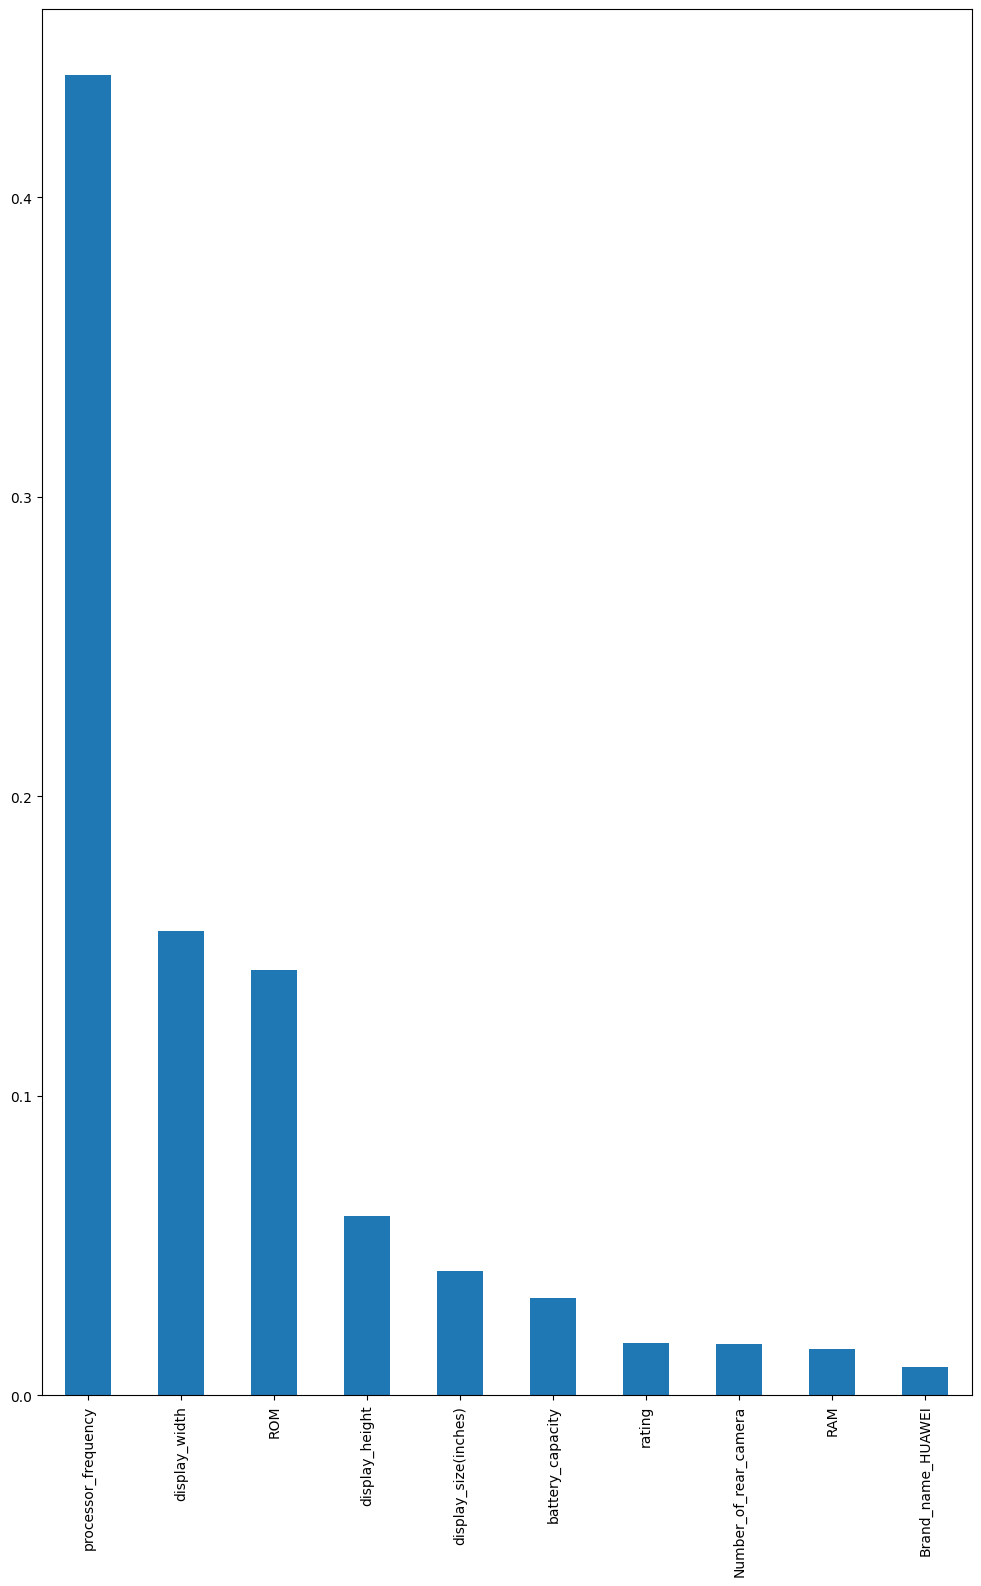

In [237]:
feature_importances.sort_values(ascending=False).head(10).plot(kind='bar',figsize=(12,18))